In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

# set directory
os.chdir('/home/vasu/Documents/chessMooveTrack/')

import cv2
from ultralytics import YOLO
from ultralytics import RTDETR

from src.utils import read_video_properties
from src.utils import extract_frames
warnings.filterwarnings("ignore")

## Inference on Object detection model no finetune


In [ ]:
# Video 
file_ = 'Video/TrainVideo/Easy_student_2.mp4'

model_name = {'RT-DETR_noExternal': 'model/RT-DETR/runs/detect/train/weights/best.pt',
                'YOLOv8_noExternal': 'model/yolo8/runs/detect/train/weights/best.pt',
                'YOLOv9_noExternal': 'model/yolo9_/runs/detect/train/weights/best.pt',
                'YOLOv10_noExternal': 'model/yolo10/runs/detect/train/weights/best.pt'}

model_classes = {
    'RT-DETR_noExternal': RTDETR,
    'YOLOv8_noExternal': YOLO,
    'YOLOv9_noExternal': YOLO,
    'YOLOv10_noExternal': YOLO
}

# Train model and save results
for model_key, path in model_name.items():
    print(model,path)
    model_class = model_classes[model_key]
    model = model_class(path)
    results = model(file_, save=True, project="output", name=model_key)

# Create Dataset from video


## Capture Frame


In [2]:
read_video_properties('Video/TrainVideo/Easy_student_2.mp4', show_Image=False)

Frame can readable: True
Frame shape Width: 920
Frame shape Height: 920
Count Frame: 334.0 frames
Count FPS: 30.027870178908568


{'frame_width': 920, 'frame_height': 920, 'frame_count': 0.0, 'fps': 0.0}

### Extract frames from video from sctrach


In [10]:
name = 'Easy_student_2'
file_ = 'Video/TrainVideo/Easy_student_2.mp4'
output_dir = 'image/train/'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(file_)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Get the total number of frames in the video
frame_number = 0

while cap.isOpened():
    if frame_number >= frame_count:
        print("Reached the end of the video. Exiting ...")
        break

    # Set the current position of the video file to the desired frame number
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Rotate the frame
    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)

    # Save the frame as an image file
    output_path = f'{output_dir}{name}_{frame_number}.jpg'
    cv2.imwrite(output_path, frame)

    # Increment frame number by 30 to skip frames
    frame_number += 30

Reached the end of the video. Exiting ...


## Test Use Function to extract frame from video


In [3]:
# Example usage
video_file = 'Video/TrainVideo/Medium_6_Student.mp4'
output_dir = 'image/train2/'
extract_frames(video_file, output_dir, frame_skip=30, name='Medium_6_Student')

Reached the end of the video. Exiting ...


### Check Size of the frame


In [17]:
img1 = cv2.imread('image/train/Easy_student_2_30.jpg')
print(img1.shape)
img = cv2.imread('image/train2/Medium_6_Student_0.jpg')
print(img.shape)

(920, 920, 3)
(1080, 1920, 3)


## Train model


In [4]:
from ultralytics import YOLO

model = YOLO('model/yolo8/yolov8m.pt')

results = model.train(
    data='image/Chess Pieces.v1i.yolov8/data.yaml', 
    epochs=30, device=0, 
    imgsz=640,
    save_period=1,
    save_json=True,
    dropout=0.1,
    plots=True,batch=-1,project="model", name='yolo8_MOD' )

New https://pypi.org/project/ultralytics/8.2.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.76 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24243MiB)
engine/trainer: task=detect, mode=train, model=model/yolo8/yolov8m.pt, data=image/Chess Pieces.v1i.yolov8/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=model, name=yolo8_MOD, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

train: Scanning /home/vasu/Documents/chessMooveTrack/image/Chess Pieces.v1i.yolov8/train/labels.cache... 448 images, 146 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<?, ?it/s]
val: Scanning /home/vasu/Documents/chessMooveTrack/image/Chess Pieces.v1i.yolov8/valid/labels.cache... 64 images, 19 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]


Plotting labels to model/yolo8_MOD/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000578125), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to model/yolo8_MOD
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      15.6G      1.455      3.858       1.51          8        640: 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         64        202      0.479      0.335      0.303      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      15.8G      1.108       1.73      1.245          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         64        202      0.574      0.702      0.762      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      15.8G     0.9985      1.143      1.149         31        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         64        202      0.682      0.704      0.794      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      15.8G     0.9937     0.9283      1.174         23        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         64        202      0.689      0.813      0.842      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      15.8G      0.971     0.8168      1.162         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         64        202      0.838      0.678      0.791        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      15.9G     0.9661      0.772      1.143         14        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         64        202      0.719      0.771      0.863      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      15.3G     0.9538     0.7101      1.147         16        640: 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         64        202      0.914      0.764      0.847      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      15.8G     0.9126     0.6842      1.128         21        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         64        202      0.851      0.837       0.88      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      15.4G     0.9116     0.6712       1.11         25        640: 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         64        202      0.691      0.808      0.779      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      15.8G     0.8605     0.6344      1.097         18        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         64        202      0.862      0.814      0.846      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      15.4G     0.8704     0.6138      1.087         19        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         64        202      0.775       0.76       0.88      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      15.7G     0.8436     0.5635      1.083         27        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         64        202      0.761      0.883       0.91      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      15.4G      0.849     0.5723      1.095         27        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         64        202      0.849      0.889      0.908      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      15.8G      0.825     0.5435      1.071         17        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         64        202      0.882      0.856      0.893      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      15.3G     0.7872     0.5232      1.049         19        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         64        202      0.916       0.87      0.931       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      15.8G     0.8005     0.4778      1.058         14        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         64        202      0.919      0.887      0.936      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      15.4G     0.7881     0.4886      1.071         15        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         64        202      0.891      0.915      0.922       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      15.8G     0.7702     0.4691      1.057         15        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         64        202      0.901      0.906      0.923      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      15.4G     0.7818      0.461      1.057         23        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         64        202      0.838      0.934      0.954      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      15.7G     0.7436     0.4401      1.024         39        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         64        202      0.875      0.877       0.94      0.753


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      15.4G      0.757     0.4215      1.074         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         64        202      0.889      0.885      0.946      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      15.8G     0.7813     0.4473      1.088         26        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         64        202      0.866      0.906      0.949      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      15.4G     0.7449      0.445      1.087         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         64        202      0.879       0.88      0.931      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      15.8G     0.7869      0.401      1.119         14        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         64        202      0.894      0.889      0.943      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      15.4G     0.7473     0.3985      1.094          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         64        202      0.894      0.885      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      15.8G     0.7152     0.3855      1.052         13        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         64        202      0.893      0.874      0.951      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      15.4G     0.7003     0.3661      1.054         18        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         64        202      0.917      0.889      0.967      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      15.8G     0.6704     0.3551      1.026         13        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         64        202      0.906      0.909      0.962       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      15.4G      0.691     0.3537      1.031         19        640: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         64        202      0.915      0.917      0.954      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      15.9G     0.6741     0.3335      1.001         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         64        202      0.913      0.917      0.956      0.764



30 epochs completed in 0.043 hours.
Optimizer stripped from model/yolo8_MOD/weights/last.pt, 52.0MB
Optimizer stripped from model/yolo8_MOD/weights/best.pt, 52.0MB

Validating model/yolo8_MOD/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24243MiB)
Model summary (fused): 218 layers, 25,847,866 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


                   all         64        202      0.913      0.917      0.955      0.764
                  Hand          1          1      0.715          1      0.995      0.796
          black-bishop          8          8       0.87      0.875      0.794       0.54
            black-king          6          6          1      0.709      0.922      0.789
          black-knight         14         15      0.983      0.933      0.991      0.803
            black-pawn         29         75      0.995      0.987      0.992      0.801
           black-queen         10         10      0.886          1      0.959      0.827
            black-rook          5          5          1      0.773      0.995      0.719
          white-bishop          9          9      0.867          1      0.951      0.768
            white-king          6          6          1      0.644      0.855       0.69
          white-knight          6          6      0.836          1      0.995      0.861
            white-paw

### Train Yolo10 Modified dataset


In [2]:
model = YOLO("/home/vasu/Documents/chessMooveTrack/model/yolo10/yolov10m.pt")

results_yolo10 = model.train(
    data='image/Chess Pieces.v1i.yolov8/data.yaml', 
    epochs=30, device=0, 
    imgsz=640,
    save_period=1,
    save_json=True,
    plots=True,batch=-1,project="model", name='yolo10_MOD')

New https://pypi.org/project/ultralytics/8.2.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.76 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24243MiB)
engine/trainer: task=detect, mode=train, model=/home/vasu/Documents/chessMooveTrack/model/yolo10/yolov10m.pt, data=image/Chess Pieces.v1i.yolov8/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=model, name=yolo10_MOD, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

train: Scanning /home/vasu/Documents/chessMooveTrack/image/Chess Pieces.v1i.yolov8/train/labels.cache... 448 images, 146 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<?, ?it/s]
val: Scanning /home/vasu/Documents/chessMooveTrack/image/Chess Pieces.v1i.yolov8/valid/labels.cache... 64 images, 19 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]


Plotting labels to model/yolo10_MOD/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.000546875), 141 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to model/yolo10_MOD
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      10.4G      2.466      10.82      2.744        107        640: 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.06it/s]

                   all         64        202      0.479      0.349      0.343      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.25G      2.216      3.974      2.468         63        640: 100%|██████████| 32/32 [00:05<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all         64        202      0.558       0.59      0.551      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.09G      2.195      2.915      2.468         58        640: 100%|██████████| 32/32 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]

                   all         64        202      0.724      0.433      0.456      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       8.1G      2.145      2.261      2.388         37        640: 100%|██████████| 32/32 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all         64        202      0.756      0.476      0.641      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.23G       2.12      2.011      2.395         23        640: 100%|██████████| 32/32 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.98it/s]

                   all         64        202      0.792       0.62      0.727      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.09G      2.085      1.822      2.374         58        640: 100%|██████████| 32/32 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.02it/s]

                   all         64        202      0.767      0.601      0.643      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.25G      2.034      1.656      2.355         78        640: 100%|██████████| 32/32 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.33it/s]

                   all         64        202      0.665      0.799      0.838      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       8.1G       1.95      1.533       2.31         76        640: 100%|██████████| 32/32 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.23it/s]

                   all         64        202      0.642       0.79      0.852      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.09G      1.943      1.476      2.306         65        640: 100%|██████████| 32/32 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.27it/s]

                   all         64        202      0.825      0.809      0.864      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.09G      1.917      1.346      2.303        124        640: 100%|██████████| 32/32 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.35it/s]

                   all         64        202      0.847      0.894      0.875      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.09G      1.929      1.312      2.318        107        640: 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.42it/s]

                   all         64        202       0.78      0.841      0.904      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.29G      1.831      1.247      2.265         61        640: 100%|██████████| 32/32 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]

                   all         64        202      0.748      0.892      0.902      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.09G      1.857      1.217      2.302         67        640: 100%|██████████| 32/32 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.41it/s]

                   all         64        202      0.831      0.821      0.853       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.08G      1.802      1.185      2.226         42        640: 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all         64        202      0.764      0.838      0.832      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.22G      1.769      1.145      2.195         67        640: 100%|██████████| 32/32 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.44it/s]

                   all         64        202      0.817      0.871      0.902       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.21G      1.778      1.155      2.184         74        640: 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.51it/s]

                   all         64        202      0.822      0.864      0.906      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.26G      1.753       1.11      2.227         63        640: 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.48it/s]

                   all         64        202      0.778      0.863      0.903      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.09G      1.766      1.107      2.226         46        640: 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.52it/s]

                   all         64        202      0.886      0.832      0.913      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.09G      1.716       1.09      2.185         79        640: 100%|██████████| 32/32 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.53it/s]

                   all         64        202      0.858      0.878      0.897       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.22G      1.626      0.941      2.116         81        640: 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.58it/s]

                   all         64        202      0.897      0.871      0.936      0.751


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.22G      1.639     0.8822      2.233         51        640: 100%|██████████| 32/32 [00:05<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all         64        202      0.914      0.848      0.926      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.39G      1.592     0.8983      2.172         54        640: 100%|██████████| 32/32 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all         64        202       0.87      0.889      0.924        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       8.1G      1.597     0.8779      2.215         54        640: 100%|██████████| 32/32 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.38it/s]

                   all         64        202      0.808      0.891      0.894      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.22G      1.601     0.8523      2.222         50        640: 100%|██████████| 32/32 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.56it/s]

                   all         64        202      0.817      0.848      0.878      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.22G      1.549      0.823      2.181         31        640: 100%|██████████| 32/32 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.53it/s]

                   all         64        202      0.946      0.821      0.893      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.21G      1.519     0.7586      2.127         40        640: 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.52it/s]

                   all         64        202      0.863      0.852      0.896      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.25G      1.494     0.7848      2.139         46        640: 100%|██████████| 32/32 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.54it/s]

                   all         64        202      0.838      0.895      0.943      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.23G      1.476     0.7527      2.098         38        640: 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.56it/s]

                   all         64        202      0.865        0.9      0.906      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.09G      1.461     0.7275      2.129         37        640: 100%|██████████| 32/32 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.50it/s]

                   all         64        202      0.842      0.909      0.908      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.22G      1.453     0.7607      2.117         32        640: 100%|██████████| 32/32 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.53it/s]

                   all         64        202      0.861      0.874      0.902      0.742



30 epochs completed in 0.049 hours.
Optimizer stripped from model/yolo10_MOD/weights/last.pt, 33.5MB
Optimizer stripped from model/yolo10_MOD/weights/best.pt, 33.5MB

Validating model/yolo10_MOD/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24243MiB)
YOLOv10m summary (fused): 369 layers, 16,466,596 parameters, 0 gradients, 63.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.36it/s]


                   all         64        202      0.839      0.894       0.94      0.775
                  Hand          1          1      0.457          1      0.995      0.895
          black-bishop          8          8      0.869      0.832      0.857      0.618
            black-king          6          6          1      0.781      0.995      0.788
          black-knight         14         15      0.917      0.933      0.974      0.789
            black-pawn         29         75      0.961      0.987      0.988      0.818
           black-queen         10         10      0.826          1      0.995       0.89
            black-rook          5          5      0.897        0.8      0.962      0.782
          white-bishop          9          9      0.676          1      0.963      0.776
            white-king          6          6      0.614      0.667      0.597      0.536
          white-knight          6          6          1      0.808      0.972      0.791
            white-paw

### Train RTDERT model on modified dataset


In [2]:
from ultralytics import RTDETR

model_DETR = RTDETR("/home/vasu/Documents/chessMooveTrack/RT-DETR/rtdetr-l.pt")

results_DETR = model_DETR.train(
    data='image/Chess Pieces.v1i.yolov8/data.yaml', 
    epochs=30, device=0, 
    imgsz=640,
    save_period=1,
    save_json=True,
    plots=True,batch=-1,)

New https://pypi.org/project/ultralytics/8.2.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.76 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24243MiB)
engine/trainer: task=detect, mode=train, model=/home/vasu/Documents/chessMooveTrack/RT-DETR/rtdetr-l.pt, data=image/Chess Pieces.v1i.yolov8/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, c

train: Scanning /home/vasu/Documents/chessMooveTrack/image/Chess Pieces.v1i.yolov8/train/labels.cache... 448 images, 146 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<?, ?it/s]
val: Scanning /home/vasu/Documents/chessMooveTrack/image/Chess Pieces.v1i.yolov8/valid/labels.cache... 64 images, 19 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       1/30      13.2G      1.154      27.81     0.7189         94        640: 100%|██████████| 28/28 [00:09<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]


                   all         64        202     0.0144      0.137     0.0113     0.0101

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       2/30      13.6G     0.6462      2.998     0.3748        104        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         64        202      0.409        0.1     0.0231     0.0164



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       3/30      13.6G     0.3564       1.61     0.1647        132        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         64        202      0.743      0.137       0.15      0.114



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       4/30      13.5G     0.3625     0.9977     0.1605         76        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         64        202      0.862      0.252      0.268       0.19



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       5/30      13.5G     0.3605      0.729     0.1574         65        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         64        202      0.822      0.357      0.405      0.289



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       6/30      13.5G     0.3506      0.629     0.1674         88        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         64        202      0.651      0.524      0.526      0.404



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       7/30      13.4G     0.3361      0.583     0.1572         71        640: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         64        202       0.68       0.66      0.721      0.535



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       8/30      13.5G     0.3114     0.5473      0.142         86        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         64        202       0.85      0.686      0.723      0.548



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       9/30      13.5G     0.2986     0.4899     0.1332         88        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         64        202      0.782      0.861      0.855      0.643



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      10/30      13.4G     0.2846     0.4605     0.1218        106        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         64        202      0.779      0.851      0.837      0.638



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      11/30      13.2G     0.2698     0.4353     0.1205         92        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         64        202      0.793      0.856      0.813      0.621



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      12/30      13.2G     0.2773     0.4324     0.1257         70        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         64        202      0.891      0.816      0.835      0.642



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      13/30      13.5G     0.2642     0.4204     0.1186         86        640: 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         64        202      0.872      0.869      0.884      0.685



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      14/30      13.4G     0.2711      0.417      0.121         86        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         64        202      0.888      0.923      0.927      0.727



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      15/30      13.4G     0.2595     0.3894     0.1057        106        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         64        202      0.872      0.883      0.889      0.694



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      16/30      13.5G      0.264     0.3868     0.1196        122        640: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         64        202      0.889      0.863       0.89      0.691



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      17/30      13.2G     0.2543     0.3745     0.1124         69        640: 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         64        202      0.888        0.9      0.929      0.722



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      18/30      13.5G      0.248     0.3751     0.1107         66        640: 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         64        202      0.844      0.913      0.911      0.689



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      19/30      13.5G     0.2481     0.3763     0.1119         62        640: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         64        202      0.887      0.915      0.928      0.711



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      20/30      13.3G     0.2485     0.3694     0.1055        120        640: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         64        202      0.851      0.886      0.898      0.683


Closing dataloader mosaic

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      21/30      13.5G     0.2375     0.3539     0.1204         66        640: 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         64        202      0.877      0.913      0.925      0.715



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      22/30      13.4G     0.2197     0.3511     0.1135         55        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         64        202      0.917      0.898      0.923      0.723



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      23/30      13.5G     0.2328      0.349     0.1197         63        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         64        202      0.906      0.864      0.873      0.687



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      24/30      13.5G     0.2193     0.3401     0.1105         64        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         64        202      0.858      0.896      0.894      0.699



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      25/30      13.5G     0.2151     0.3308     0.1089         34        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         64        202      0.887       0.92      0.913      0.722



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      26/30      13.5G     0.2229     0.3376     0.1122         49        640: 100%|██████████| 28/28 [00:09<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         64        202      0.871      0.919      0.917      0.718



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      27/30      13.5G      0.208     0.3285     0.1024         45        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         64        202      0.891      0.924      0.922      0.733



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      28/30      13.5G     0.2082     0.3219    0.09925         51        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         64        202       0.89      0.927      0.919      0.726



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      29/30      13.4G     0.2066     0.3169    0.09846         48        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         64        202      0.918        0.9      0.919      0.727



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      30/30      13.4G     0.2057      0.316     0.1025         32        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         64        202      0.926      0.923      0.917      0.732



30 epochs completed in 0.086 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 66.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 66.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24243MiB)
rt-detr-l summary: 502 layers, 32,012,510 parameters, 0 gradients, 103.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]


                   all         64        202      0.891      0.924      0.922      0.732
                  Hand          1          1      0.489          1      0.995        0.8
          black-bishop          8          8      0.869      0.875      0.844      0.578
            black-king          6          6          1      0.853      0.995      0.831
          black-knight         14         15          1      0.956      0.995      0.827
            black-pawn         29         75          1      0.986      0.985      0.785
           black-queen         10         10      0.981          1      0.995      0.849
            black-rook          5          5          1      0.991      0.995      0.767
          white-bishop          9          9      0.762          1       0.94       0.66
            white-king          6          6      0.949      0.667      0.677      0.598
          white-knight          6          6      0.963      0.833      0.835      0.733
            white-paw

### Test Inference on Model


In [12]:
# List all the files in the output directory
output_dir = 'image/train'
files = os.listdir(output_dir)
# How to use full path with files
files = [os.path.join(output_dir, file) for file in files]
print(files)

model_yolo8 = YOLO("model/yolo8_MOD/weights/best.pt")
model_yolo8.predict(files, save=True, imgsz=640, 
                    conf=0.6, iou=0.5, project="output", 
                    name="yolo8_MOD_Test")

model_yolo10 = YOLO("model/yolo10_MOD/weights/best.pt")
model_yolo10.predict(files, save=True, imgsz=640,
                    conf=0.6, iou=0.5, project="output", 
                    name="yolo10_MOD_Test")

model_DETR = RTDETR("model/RTDETR_MOD/weights/best.pt")
model_DETR.predict(files, save=True, imgsz=640,
                    conf=0.6, iou=0.5, project="output", 
                    name="DERT_MOD_Test")

['image/train/Easy_student_2_30.jpg', 'image/train/Easy_student_2_120.jpg', 'image/train/Easy_student_2_90.jpg', 'image/train/Easy_student_2_180.jpg', 'image/train/Easy_student_2_150.jpg']

0: 640x640 2 black-knights, 11 black-pawns, 1 white-knight, 13 white-pawns, 1 white-rook, 5.5ms
1: 640x640 1 black-knight, 11 black-pawns, 9 white-pawns, 1 white-rook, 5.5ms
2: 640x640 1 Hand, 2 black-knights, 11 black-pawns, 8 white-pawns, 1 white-rook, 5.5ms
3: 640x640 1 black-knight, 11 black-pawns, 1 white-knight, 13 white-pawns, 1 white-rook, 5.5ms
4: 640x640 1 Hand, 1 black-knight, 11 black-pawns, 1 white-knight, 11 white-pawns, 1 white-rook, 5.5ms
Speed: 1.2ms preprocess, 5.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to output/yolo8_MOD_Test

0: 640x640 3 black-knights, 10 black-pawns, 12 white-pawns, 6.2ms
1: 640x640 1 Hand, 10 black-pawns, 9 white-pawns, 6.2ms
2: 640x640 1 Hand, 1 black-knight, 10 black-pawns, 8 white-pawns, 6.2ms
3: 640x640 10 black-p

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Hand', 1: 'bishop', 2: 'black-bishop', 3: 'black-king', 4: 'black-knight', 5: 'black-pawn', 6: 'black-queen', 7: 'black-rook', 8: 'white-bishop', 9: 'white-king', 10: 'white-knight', 11: 'white-pawn', 12: 'white-queen', 13: 'white-rook'}
 obb: None
 orig_img: array([[[ 85,  97, 133],
         [ 81,  93, 129],
         [ 76,  85, 122],
         ...,
         [ 62,  64,  98],
         [ 64,  65,  99],
         [ 79,  78, 112]],
 
        [[ 84,  96, 132],
         [ 81,  93, 129],
         [ 76,  85, 122],
         ...,
         [ 62,  64,  98],
         [ 65,  66, 100],
         [ 80,  79, 113]],
 
        [[ 83,  95, 131],
         [ 81,  93, 129],
         [ 77,  86, 123],
         ...,
         [ 62,  64,  98],
         [ 65,  66, 100],
         [ 80,  79, 113]],
 
        ...,
 
        [[139, 141, 142],
         [136, 138, 139],
  

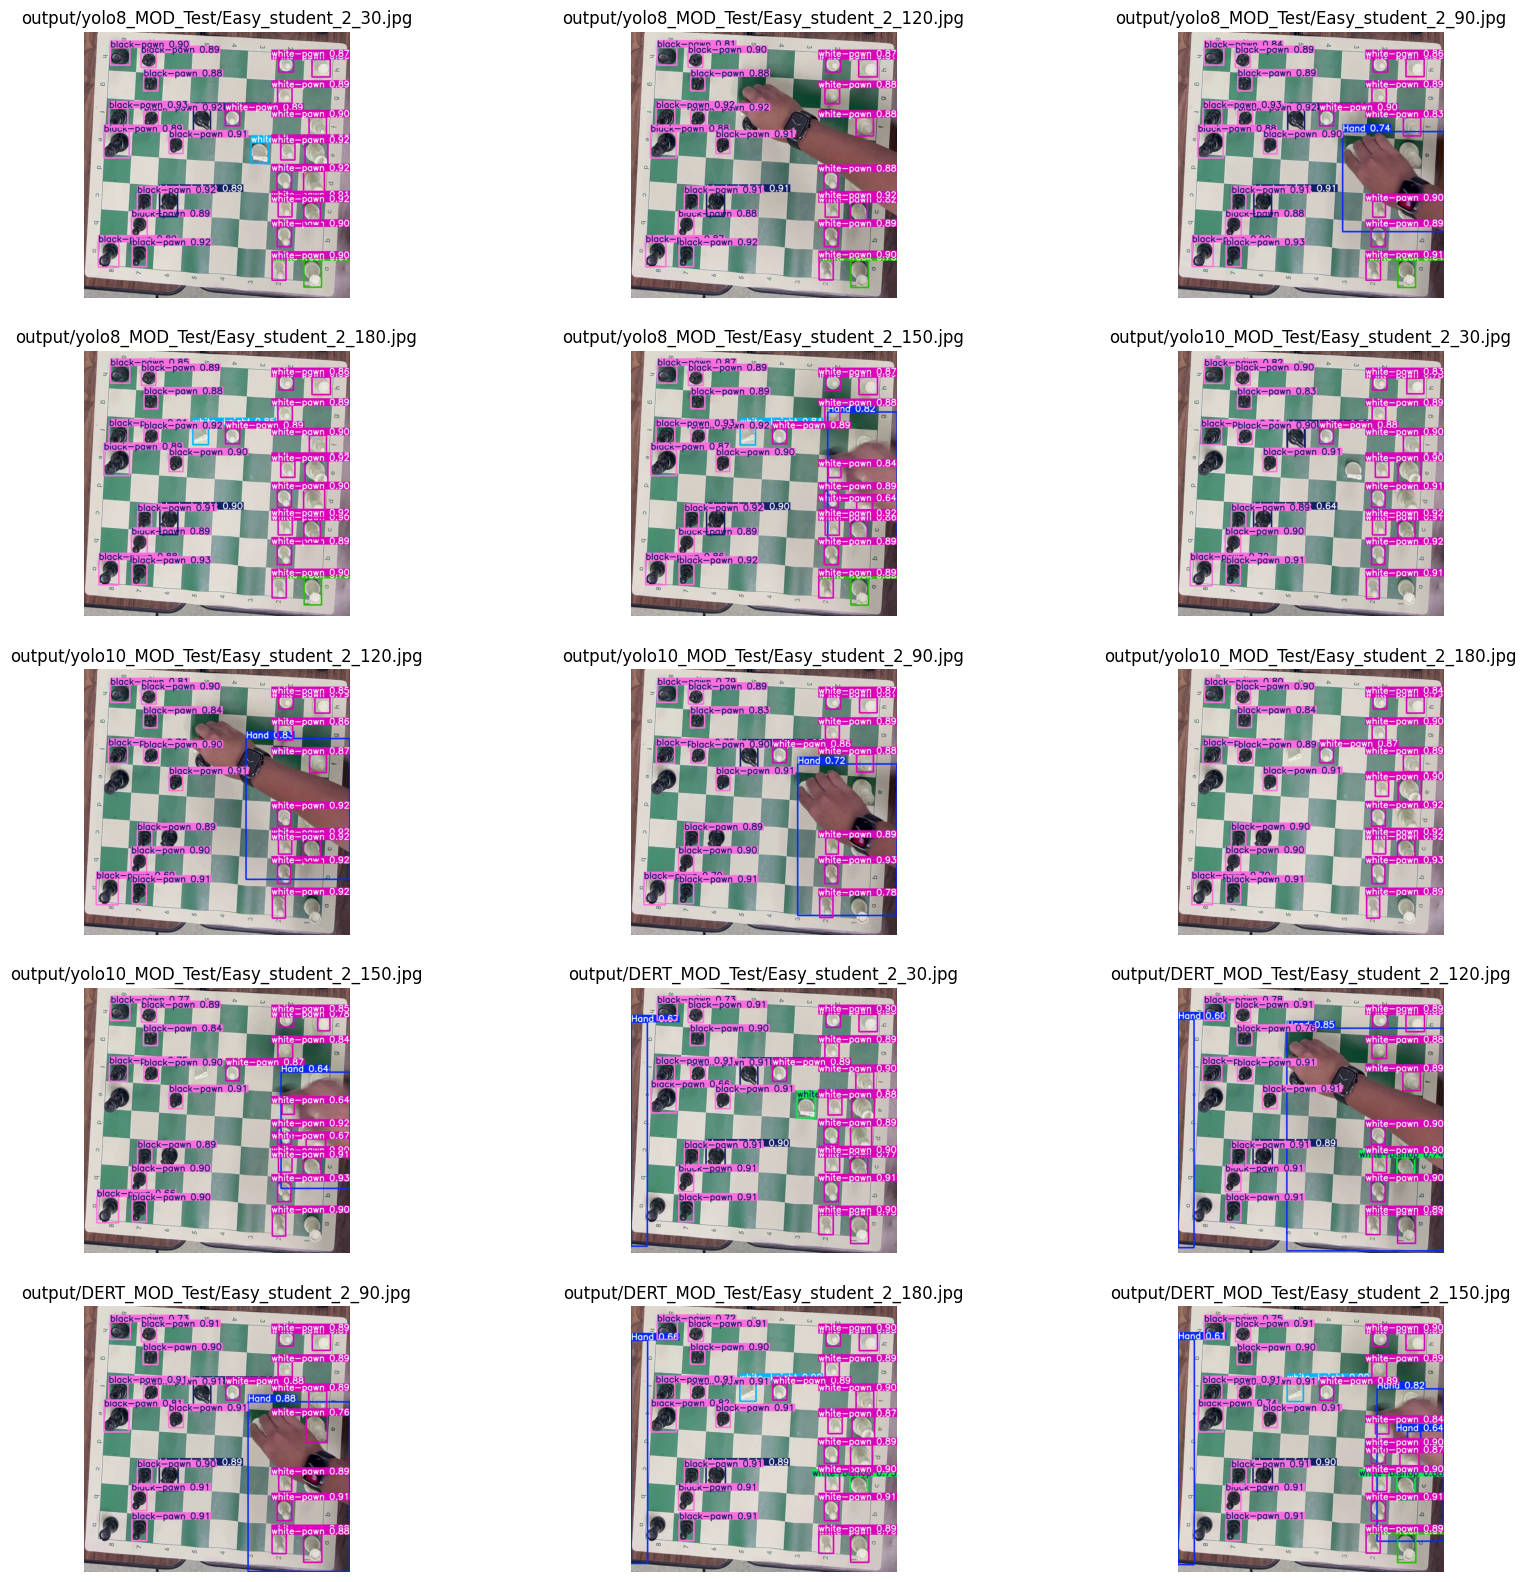

In [16]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to plot multiple images in a grid
def plot_images(images, titles, grid_shape=(5, 3), figsize=(20, 20)):
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate
    for i, (image, title) in enumerate(zip(images, titles)):
        if i < len(axes):  # Ensure we don't go out of bounds
            axes[i].imshow(image[:, :, ::-1])
            axes[i].set_title(title)
            axes[i].axis('off')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.show()

# Define the directories
output_dirs = ['output/yolo8_MOD_Test', 'output/yolo10_MOD_Test', 'output/DERT_MOD_Test']

# Initialize lists to store images and titles
images = []
titles = []

# Loop through each directory
for output_dir in output_dirs:
    # List all files in the current directory
    files = os.listdir(output_dir)
    
    # Create full paths and load images
    for file in files:
        file_path = os.path.join(output_dir, file)
        image = cv2.imread(file_path)
        if image is not None:  # Ensure the image is loaded successfully
            images.append(image)
            titles.append(file_path)

# Limit to the first 15 images to fit a 5x3 grid
images = images[:15]
titles = titles[:15]

# Plot the images in a 5x3 grid
plot_images(images, titles=titles, grid_shape=(5, 3))

## Map with chess board


In [42]:
# def preprocess(img):
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img_blur = cv2.GaussianBlur(img_gray, (3,3),1)
#     img_threshold = cv2.adaptiveThreshold(img_blur, 255,1,1,11,2)
#     return img_threshold

In [2]:
def preprocess(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img_blur = cv2.GaussianBlur(img_gray, (3,3),1)
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1)
    edges = cv2.Canny(img_blur, 50, 150)
    kernel = np.ones((5,5), np.uint8)
    img_dilated = cv2.dilate(edges, kernel, iterations=1)
    img_eroded = cv2.erode(img_dilated, kernel, iterations=1)
    #img_threshold = cv2.adaptiveThreshold(img_blur, 255,1,1,11,2)
    #return img_threshold
    return img_eroded

def reorder(pts):
    pts = pts.reshape((4,2))
    new_pts = np.zeros((4,1,2))
    sum = pts.sum(1)
    new_pts[0] = pts[np.argmin(sum)]
    new_pts[3] = pts[np.argmax(sum)]
    diff = np.diff(pts,axis=1)
    new_pts[1] = pts[np.argmin(diff)]
    new_pts[2] = pts[np.argmax(diff)]
    return new_pts

def findBiggestContour(contours):
    pts = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx) == 4:
                pts = approx
                max_area = area
    return reorder(pts), max_area

def find_board_corners(img):
    processed_img = preprocess(img)
    contours, heirarchy = cv2.findContours(processed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    biggest, maxArea = findBiggestContour(contours)
    return biggest
    
def crop_board(img, corners):
    original_img = np.float32(corners)
    new_img = np.float32([[0, 0], [WIDTH, 0], [0, HEIGHT], [WIDTH, HEIGHT]])
    matrix = cv2.getPerspectiveTransform(original_img, new_img)
    imgWarpColored = cv2.warpPerspective(img, matrix, (WIDTH, HEIGHT))
    return imgWarpColored

def get_cells(img):
    rows = np.vsplit(img,8)
    cells = [[],[],[],[],[],[],[],[]]
    for r in range(8):
        cols = np.hsplit(rows[r], 8)
        for c in cols:
            cells[r].append(c)
    return cells

## Original Image vs Video Frame Image


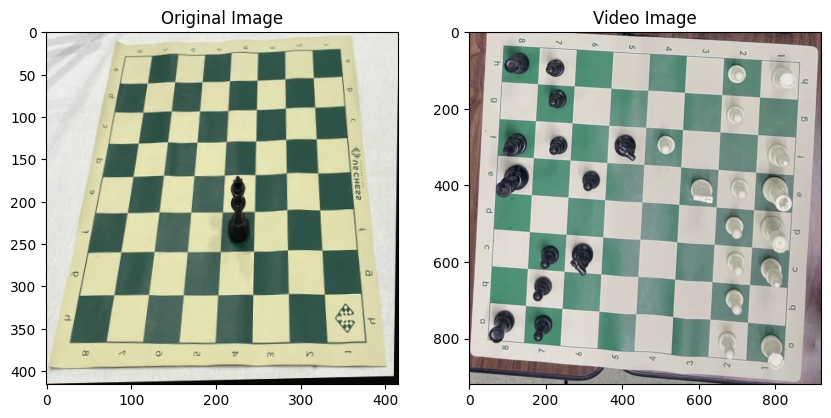

In [36]:
# multiple images plots
img_original = cv2.imread('Chess Pieces.v24-416x416_aug.yolov8/train/images/0cf670506bf9e0fe587647cd62caa232_jpg.rf.e44dd3107c47246d4ec175ac16e91830.jpg')
img_video = cv2.imread('image/train/Easy_student_2_30.jpg')

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Display the original image in the first subplot
axes[0].imshow(img_original[:, :, ::-1])
axes[0].set_title("Original Image")

# Display the video image in the second subplot
axes[1].imshow(img_video[:, :, ::-1])
axes[1].set_title("Video Image")

# Show the plots
plt.show()

## Visualize the from original Image from dataset


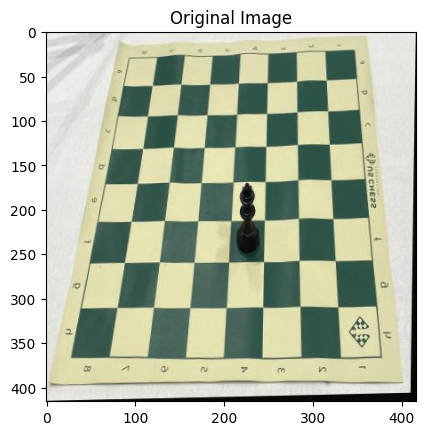

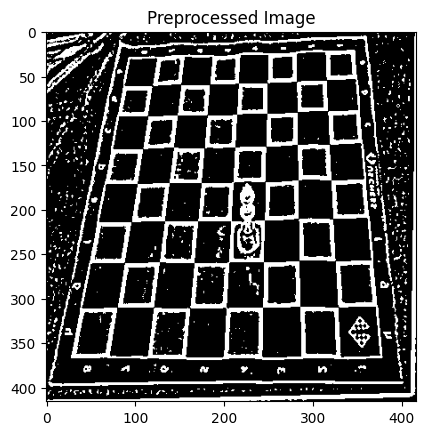

[[         92          30]]
[[        346          21]]
[[         28         367]]
[[        378         366]]


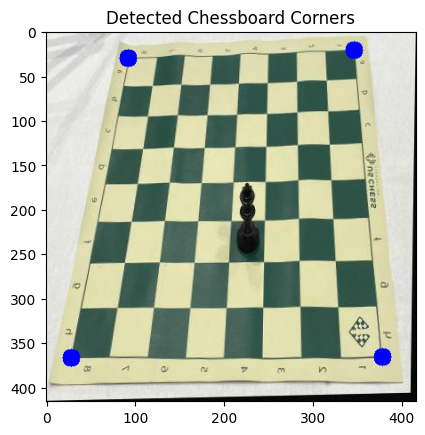

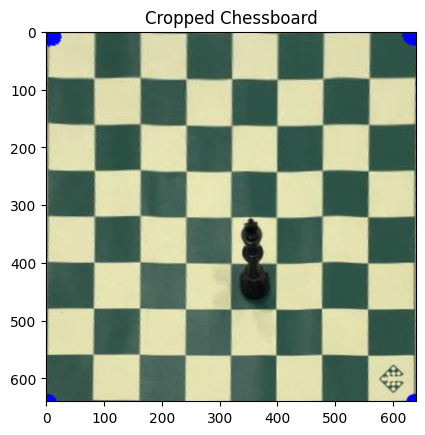

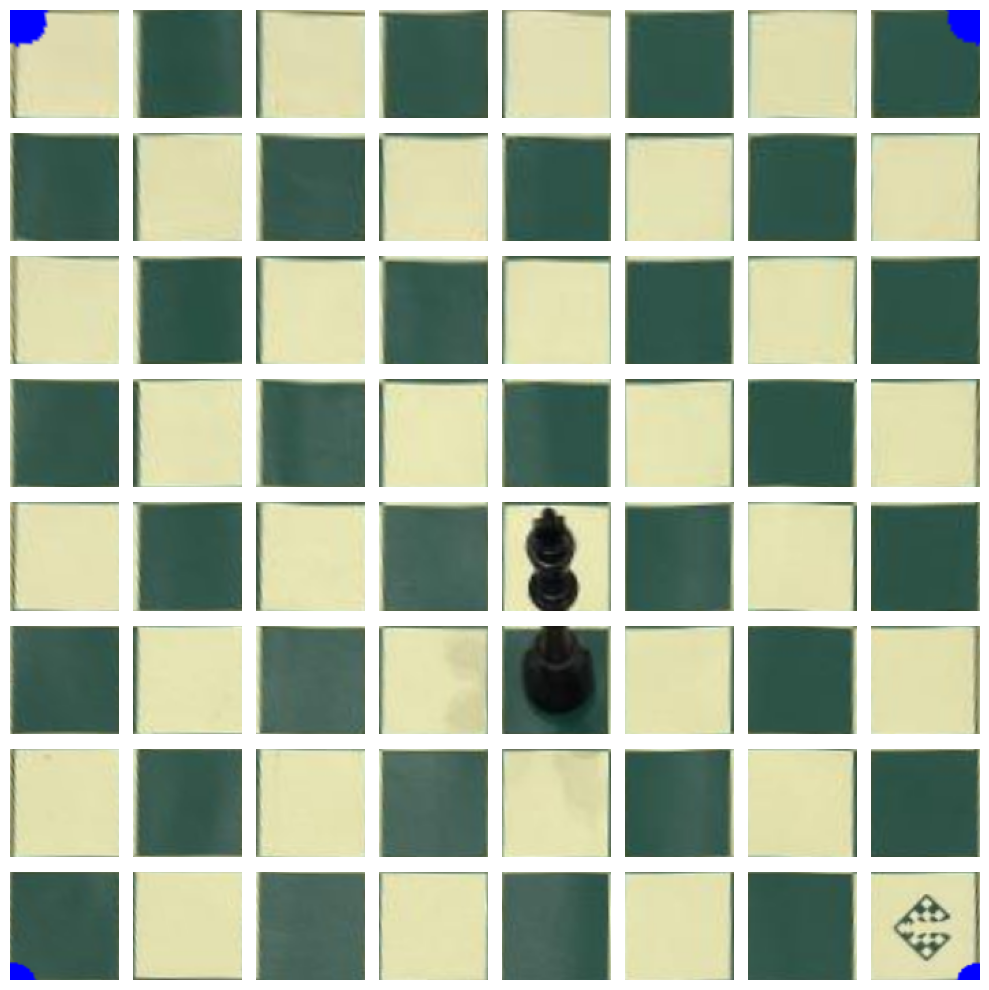

In [39]:
HEIGHT = 640
WIDTH = 640

img = cv2.imread("Chess Pieces.v24-416x416_aug.yolov8/train/images/0cf670506bf9e0fe587647cd62caa232_jpg.rf.e44dd3107c47246d4ec175ac16e91830.jpg")
plt.imshow(img[:,:,::-1])
plt.title("Original Image")
plt.show()

# Preprocess the image and show the result
preprocessed_img = preprocess(img)
plt.imshow(preprocessed_img, cmap='gray')
plt.title("Preprocessed Image")
plt.show()

# Find the chessboard corners
corners = find_board_corners(img)
if corners.size == 0:
    print("No chessboard detected.")
else:
    # Visualize detected corners
    for point in corners:
        print(point)
        point = point.ravel()  # Flatten the array to ensure it's in the form (x, y)
        cv2.circle(img, (int(point[0]), int(point[1])), 10, (255, 0, 0), -1)

    plt.imshow(img[:, :, ::-1])
    plt.title("Detected Chessboard Corners")
    plt.show()

    # Crop the chessboard to a top-down view using the detected corners
    cropped_board = crop_board(img, corners)

    # Split the cropped chessboard into 64 individual cells (8x8 grid)
    cells = get_cells(cropped_board)

    # Display the full cropped board
    plt.imshow(cropped_board[:, :, ::-1])
    plt.title("Cropped Chessboard")
    plt.show()

    # Plot all 64 cells in an 8x8 grid
    fig, axes = plt.subplots(8, 8, figsize=(10, 10))
    for i in range(8):
        for j in range(8):
            axes[i, j].imshow(cells[i][j][:,:,::-1])
            axes[i, j].axis('off')  # Hide axes for better visualization

    plt.tight_layout()
    plt.show()

## Visualize the from video frame


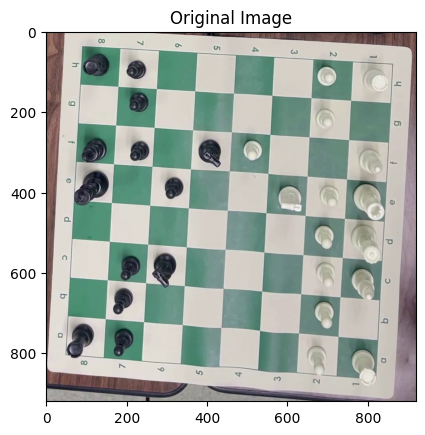

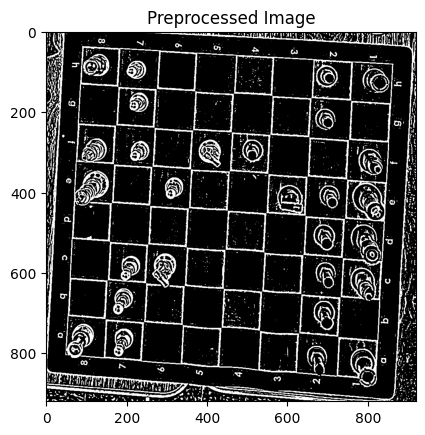

[[        635         655]]
[[        731         662]]
[[        630         751]]
[[        726         759]]


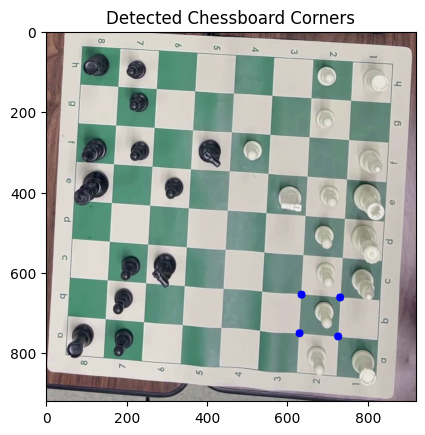

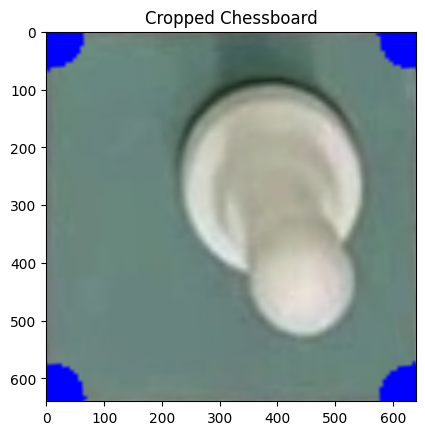

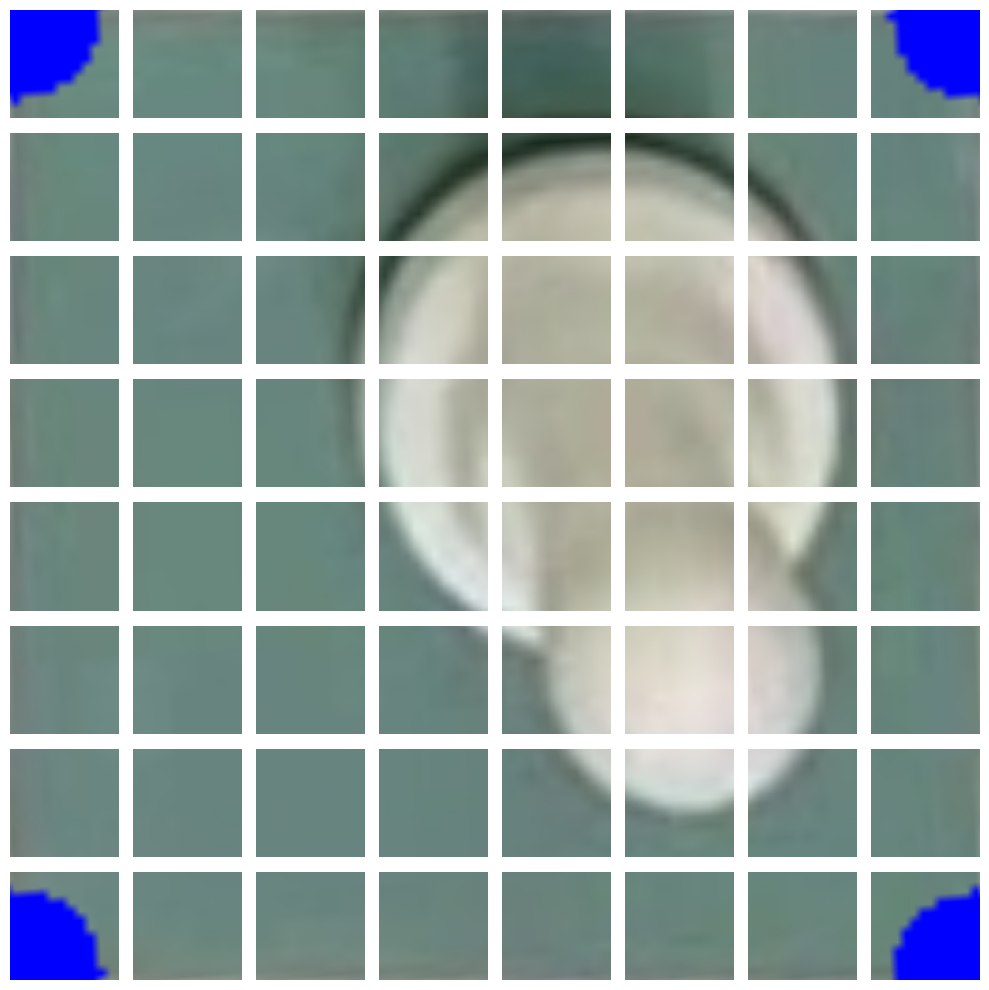

In [40]:
HEIGHT = 640
WIDTH = 640

img = cv2.imread("image/train/Easy_student_2_30.jpg")
plt.imshow(img[:,:,::-1])
plt.title("Original Image")
plt.show()

# Preprocess the image and show the result
preprocessed_img = preprocess(img)
plt.imshow(preprocessed_img, cmap='gray')
plt.title("Preprocessed Image")
plt.show()

# Find the chessboard corners
corners = find_board_corners(img)
if corners.size == 0:
    print("No chessboard detected.")
else:
    # Visualize detected corners
    for point in corners:
        print(point)
        point = point.ravel()  # Flatten the array to ensure it's in the form (x, y)
        cv2.circle(img, (int(point[0]), int(point[1])), 10, (255, 0, 0), -1)

    plt.imshow(img[:, :, ::-1])
    plt.title("Detected Chessboard Corners")
    plt.show()

    # Crop the chessboard to a top-down view using the detected corners
    cropped_board = crop_board(img, corners)

    # Split the cropped chessboard into 64 individual cells (8x8 grid)
    cells = get_cells(cropped_board)

    # Display the full cropped board
    plt.imshow(cropped_board[:, :, ::-1])
    plt.title("Cropped Chessboard")
    plt.show()

    # Plot all 64 cells in an 8x8 grid
    fig, axes = plt.subplots(8, 8, figsize=(10, 10))
    for i in range(8):
        for j in range(8):
            axes[i, j].imshow(cells[i][j][:,:,::-1])
            axes[i, j].axis('off')  # Hide axes for better visualization

    plt.tight_layout()
    plt.show()

### Fix my Use image processing to enhance the image


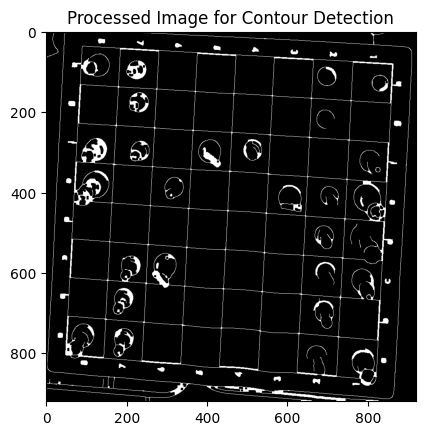

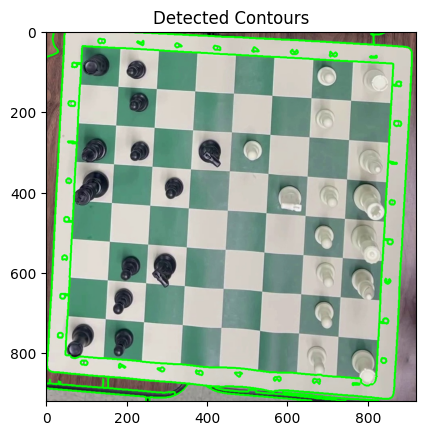

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('image/train/Easy_student_2_30.jpg')

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur with a larger kernel to reduce noise
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1)

# Apply Canny edge detection
edges = cv2.Canny(img_blur, 50, 150)

# Use dilation and erosion to close gaps in the edges
kernel = np.ones((5,5), np.uint8)
img_dilated = cv2.dilate(edges, kernel, iterations=1)
img_eroded = cv2.erode(img_dilated, kernel, iterations=1)

plt.imshow(img_eroded, cmap='gray')
plt.title("Processed Image for Contour Detection")
plt.show()

# Now, find contours
contours, _ = cv2.findContours(img_eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)
plt.imshow(img_contours[:, :, ::-1])
plt.title("Detected Contours")
plt.show()


### Fix function to find the chess board


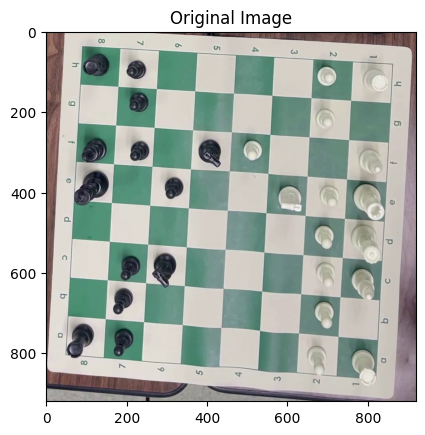

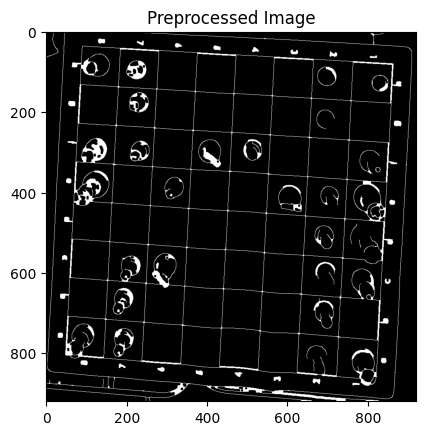

[[         90          37]]
[[        863          81]]
[[         48         805]]
[[        812         878]]


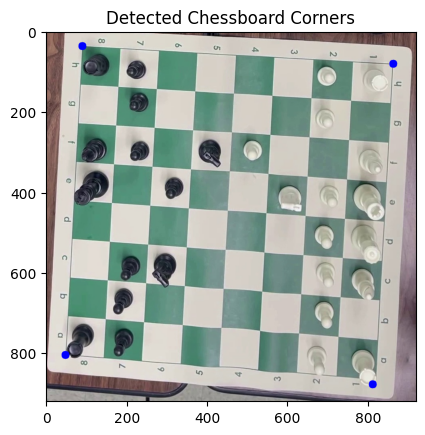

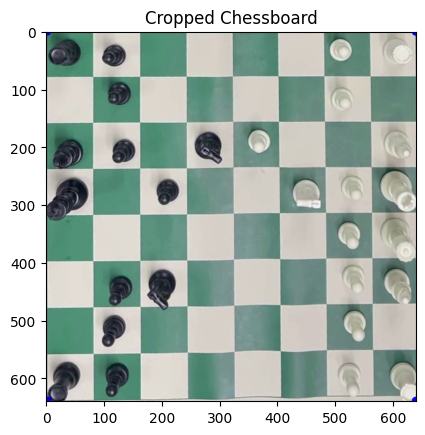

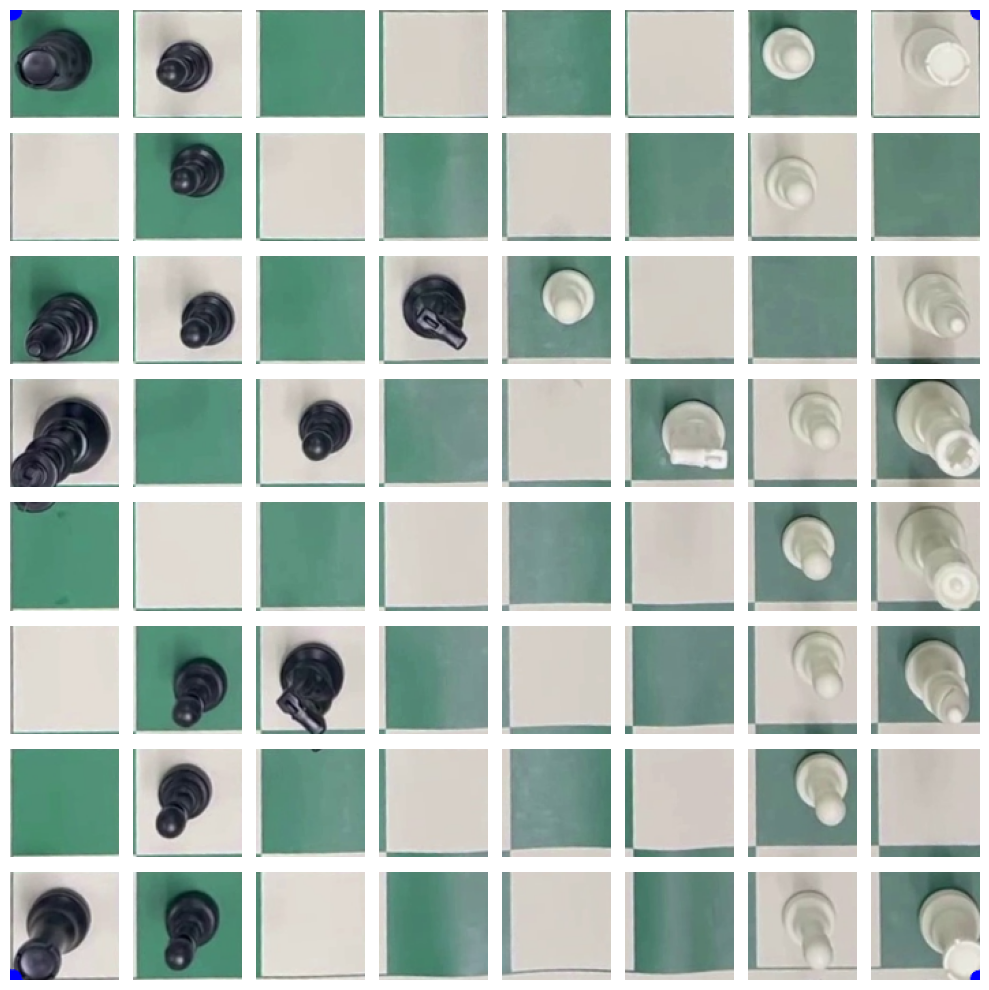

In [44]:
# Adjust Preprocess function
import cv2
import numpy as np
import matplotlib.pyplot as plt

HEIGHT = 640
WIDTH = 640

img = cv2.imread("image/train/Easy_student_2_30.jpg")
plt.imshow(img[:,:,::-1])
plt.title("Original Image")
plt.show()

# Preprocess the image and show the result
preprocessed_img = preprocess(img)
plt.imshow(preprocessed_img, cmap='gray')
plt.title("Preprocessed Image")
plt.show()

# Find the chessboard corners
corners = find_board_corners(img)
if corners.size == 0:
    print("No chessboard detected.")
else:
    # Visualize detected corners
    for point in corners:
        print(point)
        point = point.ravel()  # Flatten the array to ensure it's in the form (x, y)
        cv2.circle(img, (int(point[0]), int(point[1])), 10, (255, 0, 0), -1)

    plt.imshow(img[:, :, ::-1])
    plt.title("Detected Chessboard Corners")
    plt.show()

    # Crop the chessboard to a top-down view using the detected corners
    cropped_board = crop_board(img, corners)

    # Split the cropped chessboard into 64 individual cells (8x8 grid)
    cells = get_cells(cropped_board)

    # Display the full cropped board
    plt.imshow(cropped_board[:, :, ::-1])
    plt.title("Cropped Chessboard")
    plt.show()

    # Plot all 64 cells in an 8x8 grid
    fig, axes = plt.subplots(8, 8, figsize=(10, 10))
    for i in range(8):
        for j in range(8):
            axes[i, j].imshow(cells[i][j][:,:,::-1])
            axes[i, j].axis('off')  # Hide axes for better visualization

    plt.tight_layout()
    plt.show()

## Track chess movement on the board

- Use DETR for object detection chess pieces
- Use Contour to find chess board

This section combine the object detection model and image processing to track the chess movement on the board


In [7]:
# Check hand detection
def detect_hand(frame):
    #results = model(frame,imgsz=640, conf=0.5, iou=0.5)
    results = model(frame)
    if results and len(results[-1].boxes.cls) > 0: 
        if 0 in results[-1].boxes.cls: 
            return True
    return False


def detect_pieces(frame, model, grid_size=8,WIDTH = 640,HEIGHT = 640):
    """
    Detect chess pieces in the given frame using a YOLO model.

    Args:
        frame (numpy.ndarray): The input image/frame containing the chessboard.
        model (YOLO): The YOLO model object used for detecting pieces.
        corners (numpy.ndarray): The corners of the chessboard for perspective transformation.
        grid_size (int): The number of rows/columns on the chessboard (default is 8 for a standard 8x8 board).

    Returns:
        dict: A dictionary mapping grid positions (row, col) to detected piece labels.
    """

    corners = [
                [[90, 37]],
                [[863, 81]],
                [[48, 805]],
                [[812, 878]]
            ]
    
    bounding_boxes = []
    
    try:
        corners = find_board_corners(frame)
        print('Can find Corners')
    except:
        corners = np.array(corners)
        print('Cannot find Corners')
    
    # corners = find_board_corners(frame)
    # print('corners:',corners)
        
    # Crop and warp the chessboard to a top-down view
    frame = crop_board(frame, corners)
    
    # Run YOLO model on the cropped frame
    results = model(frame)

    # Initialize a dictionary to store piece positions
    piece_positions = {}
    
    # Chess notation mapping for rows and columns
    row_map = ['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']  
    col_map = ['8', '7', '6', '5', '4', '3', '2', '1'] 
    
    # Loop through the results and map the detected pieces to the grid
    for r in results:
        for i, box in enumerate(r.boxes.xyxy):
            # Extract the bounding box and the class label
            x1, y1, x2, y2 = map(int, box[:4])  
            cls = int(r.boxes.cls[i].item())
            label = r.names[cls]
            box_ = [x1, y1, x2, y2]
            bounding_boxes.append(box_)

            # Calculate the center of the bounding box
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2

            # Map the center of the bounding box to a grid position
            grid_row = int((center_y / frame.shape[0]) * grid_size)
            grid_col = int((center_x / frame.shape[1]) * grid_size)

            # Convert grid position to chess notation
            chess_notation = f"{row_map[grid_row]}{col_map[grid_col]}"
            
            # Row and column map for chess notation
            #piece_positions[(grid_row, grid_col)] = label

            # Notation map
            piece_positions[chess_notation] = label

            
    return piece_positions,bounding_boxes,frame

# def track_chess_movements(prev_positions, current_positions):
#     """
#     Track chess piece movements by comparing previous and current board positions.

#     Args:
#         prev_positions (dict): A dictionary of the previous positions of pieces. 
#         Keys are (row, col) tuples, values are piece labels.
#         current_positions (dict): A dictionary of the current positions of pieces.
#         Keys are (row, col) tuples, values are piece labels.

#     Returns:
#         list: A list of strings describing the detected movements.
#     """
#     moves = []

#     # Check for moved pieces and newly added pieces
#     for position, piece in current_positions.items():
#         if position in prev_positions:
#             if prev_positions[position] != piece:
#                 # Piece has changed, indicating a move
#                 moves.append(f"{prev_positions[position]} moved from {position} to {piece}")
#         else:
#             # New piece has been placed on the board
#             moves.append(f"New piece {piece} added at {position}")

#     # Check for removed pieces
#     for position in prev_positions.keys():
#         if position not in current_positions:
#             moves.append(f"{prev_positions[position]} removed from {position}")

#     return moves


def track_chess_movements(prev_positions, current_positions):
    """
    Track chess piece movements by comparing previous and current board positions using chess notation.

    Args:
        prev_positions (dict): A dictionary of the previous positions of pieces in chess notation.
        Keys are positions in chess notation (e.g., 'e2', 'h8'), values are piece labels.
        current_positions (dict): A dictionary of the current positions of pieces in chess notation.
        Keys are positions in chess notation, values are piece labels.

    Returns:
        list: A list of strings describing the detected movements in chess notation.
    """
    moves = []

    # Check for moved pieces and newly added pieces
    for position, piece in current_positions.items():
        if position in prev_positions:
            if prev_positions[position] != piece:
                # Piece has changed, indicating a move
                moves.append(f"{prev_positions[position]} moved from {position} to {piece}")
        else:
            # New piece has been placed on the board
            moves.append(f"New piece {piece} added at {position}")

    # Check for removed pieces
    for position in prev_positions.keys():
        if position not in current_positions:
            moves.append(f"{prev_positions[position]} removed from {position}")

    return moves

def track_chess_move_sequence(prev_positions, current_positions):
    move_sequence = []
    # Check for moved or newly added pieces
    for position, piece in current_positions.items():
        if position not in prev_positions or prev_positions[position] != piece:
            move_sequence.append(f"{position}{piece}")
    # Check for removed pieces
    for position in prev_positions.keys():
        if position not in current_positions:
            move_sequence.append(f"{position}{prev_positions[position]} removed")
    return ' '.join(move_sequence)

def visualize_pieces(frame, piece_positions, bounding_boxes, color=(0, 255, 0), thickness=2, font_scale=0.5):
    """
    Visualize bounding boxes and labels for each detected piece on the chessboard.

    Args:
        frame (numpy.ndarray): The input image/frame containing the chessboard.
        piece_positions (dict): A dictionary mapping chess notation positions (e.g., 'e2', 'h8') to detected piece labels.
        bounding_boxes (list): A list of bounding boxes corresponding to the piece positions.
        color (tuple): The color of the bounding box and text (default is green).
        thickness (int): The thickness of the bounding box (default is 2).
        font_scale (float): The scale of the font for labeling (default is 0.5).

    Returns:
        numpy.ndarray: The frame with visualized bounding boxes and labels.
    """    
    for (position, label), box in zip(piece_positions.items(), bounding_boxes):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = map(int, box)
        
        # Draw the bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)
        
        # Put the label text above the bounding box
        text = f"{label} ({position})"
        cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, thickness)
    
    return frame

Cannot find Corners

0: 640x640 1 Hand, 3 black-knights, 11 black-pawns, 10 white-pawns, 6.9ms
Speed: 1.3ms preprocess, 6.9ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 640)
{'a2': 'white-pawn', 'b2': 'white-pawn', 'c6': 'black-knight', 'f5': 'black-knight', 'f1': 'white-pawn', 'f4': 'white-pawn', 'a7': 'black-pawn', 'g2': 'white-pawn', 'e6': 'black-pawn', 'f7': 'black-pawn', 'h7': 'black-pawn', 'c7': 'black-pawn', 'h2': 'white-pawn', 'b7': 'black-pawn', 'c2': 'white-pawn', 'd2': 'Hand', 'f8': 'black-pawn', 'g7': 'black-pawn', 'h1': 'white-pawn', 'h8': 'black-pawn', 'a1': 'white-pawn', 'e8': 'black-knight', 'a8': 'black-pawn', 'c1': 'white-pawn'}

0: 640x640 1 Hand, 3 black-knights, 11 black-pawns, 10 white-pawns, 6.9ms
Speed: 0.7ms preprocess, 6.9ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Check Hand: True
[[505, 573, 545, 632], [514, 482, 555, 540], [174, 410, 225, 483], [256, 172, 307, 232], [584, 172, 634, 221], [348, 169, 388, 213], [101, 5

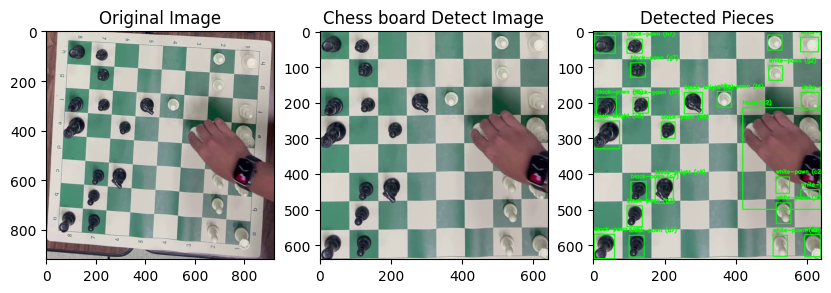

In [5]:
# Example usage
frame = cv2.imread('image/train/Easy_student_2_90.jpg')

# Plt plot multiple images 1x2
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(frame[:,:,::-1])
axes[0].set_title("Original Image")


model = YOLO('model/yolo10_MOD/weights/best.pt') 

# Detect pieces on the chessboard
WIDTH = 640
HEIGHT = 640

piece_positions, bounding_boxes, frame = detect_pieces(frame, model)
current_positions = piece_positions 

# Display the piece positions
print(current_positions)
print('Check Hand:',detect_hand(frame))

axes[1].imshow(frame[:,:,::-1])
axes[1].set_title("Chess board Detect Image")

# Visualize the detected pieces with bounding boxes
visualized_frame = visualize_pieces(frame, piece_positions, bounding_boxes)
axes[2].imshow(visualized_frame[:,:,::-1])
axes[2].set_title("Detected Pieces")

print(bounding_boxes)

In [6]:
piece_positions

{'a2': 'white-pawn',
 'b2': 'white-pawn',
 'c6': 'black-knight',
 'f5': 'black-knight',
 'f1': 'white-pawn',
 'f4': 'white-pawn',
 'a7': 'black-pawn',
 'g2': 'white-pawn',
 'e6': 'black-pawn',
 'f7': 'black-pawn',
 'h7': 'black-pawn',
 'c7': 'black-pawn',
 'h2': 'white-pawn',
 'b7': 'black-pawn',
 'c2': 'white-pawn',
 'd2': 'Hand',
 'f8': 'black-pawn',
 'g7': 'black-pawn',
 'h1': 'white-pawn',
 'h8': 'black-pawn',
 'a1': 'white-pawn',
 'e8': 'black-knight',
 'a8': 'black-pawn',
 'c1': 'white-pawn'}

In [10]:
# Example usage with new chess notation
prev_positions = {
                    'h8': 'rook',
                    'g7': 'knight',
                    'f6': 'bishop',
                    'e2': 'queen'
                    }

current_positions = {
                    'h8': 'rook',         
                    'g7': 'knight', 
                    'g4': 'pawn' ,     
                    'f6': 'queen',        # Bishop moved away, Queen moved here
                    'e4': 'bishop'        # Bishop moved from f6 to e4
                }

moves = track_chess_movements(prev_positions, current_positions)

for move in moves:
    print(move)

New piece pawn added at g4
bishop moved from f6 to queen
New piece bishop added at e4
queen removed from e2


## Test on video


In [9]:
import time

model = YOLO('model/yolo10_MOD/weights/best.pt')
video_capture = cv2.VideoCapture('Video/TrainVideo/Easy_student_2.mp4')

prev_positions = {}
current_positions = {}

# Track the frame number
frame_count = 0

WIDTH = 640
HEIGHT = 640

out = cv2.VideoWriter('output/outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (WIDTH,HEIGHT))

sequence = {}

while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break

    # Detect hand in the frame
    if detect_hand(frame):
        print("Hand detected, skipping this frame.")
        continue

    # Detect pieces in the current frame
    current_positions,bounding_boxes,frame = detect_pieces(frame, model)
    print('Current_position:',current_positions)

    if prev_positions:
        # Track and print the movements
        movements = track_chess_movements(prev_positions, current_positions)
        for move in movements:
            print(f"Frame {frame_count}: {move}")

    # Update previous positions for the next iteration
    prev_positions = current_positions.copy()
    
    # Draw bounding boxes and labels on the frame
    frame = visualize_pieces(frame, current_positions, bounding_boxes)
    
    # Save the Video with detected pieces
    out.write(frame)
    
    # Display the frame with optional overlays
    #cv2.imshow('Chess Movement Detection', frame)

    # Break the loop on 'q' key press
    #if cv2.waitKey(1) & 0xFF == ord('q'):
    #    break

    # Increment frame count
    frame_count += 1

    # Optional: Add delay to simulate real-time processing
    time.sleep(0.1)

# Release the video capture object and close all OpenCV windows
#video_capture.release()
#cv2.destroyAllWindows()


0: 640x640 1 Hand, 2 black-knights, 11 black-pawns, 1 white-knight, 15 white-pawns, 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 1 white-knight, 14 white-pawns, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 1 white-knight, 14 white-pawns, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 14 white-pawns, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 14 whit

In [53]:
print(prev_positions)
print(current_positions)

moves = track_chess_movements(prev_positions, current_positions)

for move in moves:
    print(move)

{'c3': 'black-knight', 'b8': 'black-pawn', 'b7': 'black-pawn', 'b6': 'black-pawn', 'e6': 'white-pawn', 'g8': 'white-pawn', 'b1': 'black-pawn', 'b2': 'black-pawn', 'g5': 'white-pawn', 'a6': 'black-pawn', 'g4': 'white-pawn', 'g7': 'white-pawn', 'g2': 'white-pawn', 'a8': 'black-pawn', 'd6': 'black-pawn', 'b3': 'black-pawn', 'g1': 'white-pawn', 'g3': 'white-pawn', 'h1': 'white-pawn', 'h3': 'white-knight', 'h5': 'white-knight', 'h8': 'white-pawn', 'a5': 'black-bishop', 'a1': 'black-pawn', 'h4': 'white-knight'}
{'c3': 'black-knight', 'b8': 'black-pawn', 'b7': 'black-pawn', 'b6': 'black-pawn', 'e6': 'white-pawn', 'g8': 'white-pawn', 'b1': 'black-pawn', 'b2': 'black-pawn', 'g5': 'white-pawn', 'a6': 'black-pawn', 'g4': 'white-pawn', 'g7': 'white-pawn', 'g2': 'white-pawn', 'a8': 'black-pawn', 'd6': 'black-pawn', 'b3': 'black-pawn', 'g1': 'white-pawn', 'g3': 'white-pawn', 'h1': 'white-pawn', 'h3': 'white-knight', 'h5': 'white-knight', 'h8': 'white-pawn', 'a5': 'black-bishop', 'a1': 'black-pawn', 

## Test sequence each frame on video


In [11]:
model = YOLO('model/yolo10_MOD/weights/best.pt')
video_capture = cv2.VideoCapture('Video/TrainVideo/Easy_student_2.mp4')

prev_positions = {}
current_positions = {}

# Track the frame number
frame_count = 0

WIDTH = 640
HEIGHT = 640

out = cv2.VideoWriter('output/outpy.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (WIDTH, HEIGHT))

# Dictionary to store the sequence of positions
sequence = {}

while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break

    # Detect hand in the frame
    if detect_hand(frame):
        print("Hand detected, skipping this frame.")
        continue

    # Detect pieces in the current frame
    current_positions, bounding_boxes, frame = detect_pieces(frame, model)
    print('Current_position:', current_positions)

    if prev_positions:
        # Track and print the movements
        movements = track_chess_movements(prev_positions, current_positions)
        for move in movements:
            print(f"Frame {frame_count}: {move}")

    # Store current positions in the sequence dictionary with the frame number as the key
    sequence[str(frame_count)] = current_positions.copy()
    
    # Update previous positions for the next iteration
    prev_positions = current_positions.copy()
    
    # Draw bounding boxes and labels on the frame
    frame = visualize_pieces(frame, current_positions, bounding_boxes)
    
    # Save the video with detected pieces
    out.write(frame)
    

    # Increment frame count
    frame_count += 1

    # Optional: Add delay to simulate real-time processing
    time.sleep(0.1)

# Release the video capture object and close all OpenCV windows
video_capture.release()
out.release()
cv2.destroyAllWindows()





0: 640x640 1 Hand, 2 black-knights, 11 black-pawns, 1 white-knight, 15 white-pawns, 6.7ms
Speed: 1.3ms preprocess, 6.7ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 1 white-knight, 14 white-pawns, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 1 white-knight, 14 white-pawns, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 14 white-pawns, 6.8ms
Speed: 1.0ms preprocess, 6.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 14 whit

In [12]:
for frame_num, positions in sequence.items():
    print(f"Frame {frame_num}: {positions}")

Frame 0: {'c3': 'black-knight', 'b8': 'black-pawn', 'e6': 'white-pawn', 'b6': 'black-pawn', 'b7': 'black-pawn', 'g5': 'white-pawn', 'g8': 'white-pawn', 'd6': 'black-knight', 'c5': 'black-pawn', 'g4': 'white-pawn', 'b1': 'black-pawn', 'b2': 'black-pawn', 'g2': 'white-pawn', 'g7': 'white-pawn', 'a6': 'black-pawn', 'a8': 'black-pawn', 'b3': 'black-pawn', 'g1': 'white-pawn', 'h1': 'white-pawn', 'g3': 'white-pawn', 'f5': 'white-pawn', 'h5': 'white-knight', 'h3': 'white-knight', 'h8': 'white-pawn', 'a5': 'black-knight', 'h4': 'white-pawn', 'a1': 'black-pawn'}
Frame 1: {'c3': 'black-knight', 'b8': 'black-pawn', 'g8': 'white-pawn', 'b7': 'black-pawn', 'e6': 'white-pawn', 'b6': 'black-pawn', 'd6': 'black-knight', 'g4': 'white-pawn', 'g5': 'white-pawn', 'c5': 'black-pawn', 'b1': 'black-pawn', 'b2': 'black-pawn', 'g2': 'white-pawn', 'b3': 'black-pawn', 'a8': 'black-pawn', 'a6': 'black-pawn', 'g7': 'white-pawn', 'g1': 'white-pawn', 'g3': 'white-pawn', 'h1': 'white-pawn', 'f5': 'white-pawn', 'h5': 

## Test 4 Steps


In [9]:
import time
import cv2
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('model/yolo10_MOD/weights/best.pt')

# Load video
video_capture = cv2.VideoCapture('Video/TrainVideo/Easy_student_2.mp4')

# Initialize variables
prev_positions = {}
current_positions = {}
frame_count = 0
turn_count = 1
WIDTH, HEIGHT = 640, 640

# Video writer to save output with bounding boxes
out = cv2.VideoWriter('output/outpy.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (WIDTH, HEIGHT))

# Dictionary to store moves for each turn in the desired format
sequence = {}

# Function to track chess moves in the desired format
def track_chess_move_sequence(prev_positions, current_positions):
    move_sequence = []
    # Check for moved or newly added pieces
    for position, piece in current_positions.items():
        if position not in prev_positions or prev_positions[position] != piece:
            move_sequence.append(f"{position}-{piece}")
    # Check for removed pieces
    for position in prev_positions.keys():
        if position not in current_positions:
            move_sequence.append(f"{position}-{prev_positions[position]} removed")
    return ' '.join(move_sequence)

# Process each frame of the video
while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break

    # Detect hand in the frame
    if detect_hand(frame):
        print("Hand detected, skipping this frame.")
        continue

    # Detect pieces in the current frame
    current_positions, bounding_boxes, frame = detect_pieces(frame, model)
    print('Current_position:', current_positions)

    # Track and store movements for each turn
    if prev_positions:
        # Track moves between the previous and current positions
        moves = track_chess_move_sequence(prev_positions, current_positions)
        # Only log moves if there is a change in positions
        if moves:
            sequence[f"turn{turn_count}"] = moves
            print(f"Turn {turn_count}: {moves}")
            turn_count += 1  # Increment turn count after each valid move

    # Update previous positions for the next iteration
    prev_positions = current_positions.copy()
    
    # Draw bounding boxes and labels on the frame
    frame = visualize_pieces(frame, current_positions, bounding_boxes)
    
    # Save the video with detected pieces
    #out.write(frame)
    

    # Increment frame count
    frame_count += 1

    # Optional: Add delay to simulate real-time processing
    time.sleep(0.1)


# Print the tracked chess moves with each turn
print("Tracked Chess Moves Across Turns:")
for turn, moves in sequence.items():
    print(f"{turn}: {moves}")


0: 640x640 1 Hand, 2 black-knights, 11 black-pawns, 1 white-knight, 15 white-pawns, 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 1 white-knight, 14 white-pawns, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 1 white-knight, 14 white-pawns, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 14 white-pawns, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Hand detected, skipping this frame.

0: 640x640 1 Hand, 1 black-bishop, 2 black-knights, 11 black-pawns, 14 whit

In [16]:
import pandas as pd
sequence = {
    'turn1': 'e4-whitebishop removed',
}

# Split each turn's moves into "white" and "black" columns
data = []
for turn, moves in sequence.items():
    white_move = None
    black_move = None
    
    # Split the moves by space and assign to white and black
    moves_split = moves.split()
    for move in moves_split:
        if 'white' in move:
            white_move = move
        elif 'black' in move:
            black_move = move
    
    # Add the turn and corresponding moves to the data list
    data.append([turn, white_move, black_move])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Turn', 'white', 'black'])

# Display the DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('output/chess_moves_1_step_test.csv', index=False)

    Turn           white black
0  turn1  e4-whitebishop  None


In [10]:
import time
import cv2
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('model/yolo10_MOD/weights/best.pt')

# Load video
video_capture = cv2.VideoCapture('Video/TrainVideo/2_Move_label.mp4')

# Initialize variables
prev_positions = {}
current_positions = {}
frame_count = 0
turn_count = 1
WIDTH, HEIGHT = 640, 640

# Dictionary to store moves for each turn in the desired format
sequence = {}



# Process each frame of the video
while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break

    # Detect hand in the frame
    if detect_hand(frame):
        print("Hand detected, skipping this frame.")
        continue

    # Detect pieces in the current frame
    current_positions, bounding_boxes, frame = detect_pieces(frame, model)
    print('Current_position:', current_positions)

    # Track and store movements for each turn
    if prev_positions:
        # Track moves between the previous and current positions
        moves = track_chess_move_sequence(prev_positions, current_positions)
        # Only log moves if there is a change in positions
        if moves:
            sequence[f"turn{turn_count}"] = moves
            print(f"Turn {turn_count}: {moves}")
            turn_count += 1  # Increment turn count after each valid move

    # Update previous positions for the next iteration
    prev_positions = current_positions.copy()
    
    # Draw bounding boxes and labels on the frame
    frame = visualize_pieces(frame, current_positions, bounding_boxes)
    
    # Save the video with detected pieces
    #out.write(frame)
    

    # Increment frame count
    frame_count += 1

    # Optional: Add delay to simulate real-time processing
    time.sleep(0.1)


# Print the tracked chess moves with each turn
print("Tracked Chess Moves Across Turns:")
for turn, moves in sequence.items():
    print(f"{turn}: {moves}")


0: 640x384 14 black-pawns, 2 white-knights, 8 white-pawns, 86.9ms
Speed: 1.0ms preprocess, 86.9ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 384)
Cannot find Corners

0: 640x640 1 Hand, 1 black-pawn, 1 white-knight, 7 white-pawns, 1 white-rook, 7.1ms
Speed: 0.7ms preprocess, 7.1ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Current_position: {'a2': 'white-knight', 'a6': 'black-pawn', 'b6': 'white-pawn', 'b7': 'white-pawn', 'b5': 'white-pawn', 'c4': 'white-pawn', 'c2': 'white-pawn', 'e2': 'Hand', 'a1': 'white-pawn', 'c8': 'white-pawn'}

0: 640x384 14 black-pawns, 3 white-knights, 8 white-pawns, 7.1ms
Speed: 3.3ms preprocess, 7.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 384)
Cannot find Corners

0: 640x640 1 Hand, 1 black-pawn, 2 white-knights, 9 white-pawns, 7.1ms
Speed: 0.7ms preprocess, 7.1ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Current_position: {'a2': 'white-knight', 'a6': 'black-pawn', 'b6': 'wh

In [42]:
sequence = {
    'turn1': 'd3-white-pawn c7-white-pawn c5-white-pawn a1-white-knight c8-white-pawn removed',
    'turn2': 'd4-white-pawn c4-white-pawn removed e2-Hand removed',
    'turn3': 'c2-white-pawn removed',
    'turn4': 'c2-white-pawn',
    'turn5': 'a1-white-pawn',
    'turn6': 'a1-white-knight',
    'turn7': 'a1-white-pawn',
    'turn8': 'a1-white-knight',
    'turn9': 'a1-white-pawn',
    'turn10': 'a1-white-knight',
    'turn11': 'a2-white-knight removed a6-black-pawn removed b7-white-pawn removed b5-white-pawn removed b6-white-pawn removed c5-white-pawn removed c2-white-pawn removed d3-white-pawn removed d4-white-pawn removed c7-white-pawn removed a1-white-knight removed',
    'turn12': 'a1-white-knight',
    'turn13': 'a1-white-pawn',
    'turn14': 'a2-white-knight removed a6-black-pawn removed b7-white-pawn removed b6-white-pawn removed b5-white-pawn removed c2-white-pawn removed c5-white-pawn removed d3-white-pawn removed d4-white-pawn removed c7-white-pawn removed a1-white-pawn removed',
    'turn15': 'a1-white-pawn',
    'turn16': 'a1-white-knight',
    'turn17': 'a1-white-pawn',
    'turn18': 'a1-white-knight',
    'turn19': 'a1-white-pawn',
    'turn20': 'a1-white-knight',
    'turn21': 'a1-white-pawn c2-white-pawn removed',
    'turn22': 'c2-white-pawn',
    'turn23': 'a1-white-knight',
    'turn24': 'a1-white-pawn',
    'turn25': 'a1-white-knight',
    'turn26': 'a1-white-pawn c2-white-pawn removed',
    'turn27': 'c2-white-pawn',
    'turn28': 'a1-white-knight',
    'turn29': 'c2-white-pawn removed',
    'turn30': 'c2-white-pawn',
    'turn31': 'c2-white-pawn removed',
    'turn32': 'c2-white-pawn',
    'turn33': 'a1-white-pawn',
    'turn34': 'a1-white-knight',
    'turn35': 'c2-white-pawn removed',
    'turn36': 'a1-white-pawn',
    'turn37': 'c2-white-pawn a1-white-knight',
    'turn38': 'a1-white-pawn',
    'turn39': 'a1-white-knight',
    'turn40': 'a1-white-pawn',
    'turn41': 'a1-white-knight',
    'turn42': 'a1-white-pawn',
    'turn43': 'a1-white-knight',
    'turn44': 'a1-white-pawn',
    'turn45': 'a1-white-knight',
    'turn46': 'a1-white-pawn',
    'turn47': 'a1-white-knight',
    'turn48': 'a1-white-pawn',
    'turn49': 'a1-white-knight',
    'turn50': 'a1-white-pawn',
    'turn51': 'a1-white-knight',
    'turn52': 'a1-white-pawn',
    'turn53': 'a1-white-knight',
    'turn54': 'a1-white-pawn',
    'turn55': 'a1-white-knight',
    'turn56': 'a1-white-pawn',
    'turn57': 'a1-white-knight',
    'turn58': 'a1-white-pawn',
    'turn59': 'd3-white-pawn removed',
    'turn60': 'd3-white-pawn',
    'turn61': 'a1-white-knight',
    'turn62': 'a1-white-pawn',
    'turn63': 'a1-white-knight',
    'turn64': 'a1-white-pawn',
    'turn65': 'a1-white-knight',
    'turn66': 'a1-white-pawn',
    'turn67': 'a1-white-knight',
    'turn68': 'a1-white-pawn',
    'turn69': 'a1-white-knight',
    'turn70': 'b5-Hand e2-Hand a6-black-pawn removed b6-white-pawn removed d3-white-pawn removed',
    'turn71': 'a2-white-knight removed b7-white-pawn removed c2-white-pawn removed d4-white-pawn removed c5-white-pawn removed c7-white-pawn removed b5-Hand removed a1-white-knight removed e2-Hand removed',
    'turn72': 'b6-white-pawn c5-white-pawn b5-black-pawn e2-Hand removed',
    'turn73': 'c8-white-pawn c7-white-pawn removed',
    'turn74': 'c7-white-pawn c8-white-pawn removed',
    'turn75': 'c8-white-pawn c7-white-pawn removed',
    'turn76': 'c7-white-pawn c8-white-pawn removed',
    'turn77': 'a1-white-knight',
    'turn78': 'a1-white-pawn',
    'turn79': 'a1-white-knight',
    'turn80': 'a1-white-pawn',
    'turn81': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c2-white-pawn removed d4-white-pawn removed d3-white-pawn removed c5-white-pawn removed c7-white-pawn removed b5-black-pawn removed a1-white-pawn removed',
    'turn82': 'a1-white-knight',
    'turn83': 'a1-white-pawn',
    'turn84': 'a1-white-knight',
    'turn85': 'a1-white-pawn',
    'turn86': 'c8-white-pawn c7-white-pawn removed',
    'turn87': 'c7-white-pawn c8-white-pawn removed',
    'turn88': 'b5-black-pawn removed',
    'turn89': 'b5-black-pawn',
    'turn90': 'b5-black-pawn removed',
    'turn91': 'b5-black-pawn',
    'turn92': 'b5-black-pawn removed',
    'turn93': 'b5-black-pawn',
    'turn94': 'b5-black-pawn removed',
    'turn95': 'b5-black-pawn',
    'turn96': 'b5-black-pawn removed',
    'turn97': 'b5-black-pawn',
    'turn98': 'a1-white-knight',
    'turn99': 'a1-white-pawn',
    'turn100': 'c8-white-pawn c7-white-pawn removed',
    'turn101': 'c8-white-pawn removed',
    'turn102': 'c8-white-pawn b5-black-pawn removed',
    'turn103': 'b5-black-pawn c7-white-knight c8-white-pawn removed',
    'turn104': 'c7-white-pawn',
    'turn105': 'b5-black-pawn removed',
    'turn106': 'c7-white-knight',
    'turn107': 'c7-white-pawn',
    'turn108': 'b5-black-pawn',
    'turn109': 'b5-black-pawn removed',
    'turn110': 'b5-black-pawn',
    'turn111': 'a1-white-knight',
    'turn112': 'c8-white-pawn a1-white-pawn c7-white-pawn removed b5-black-pawn removed',
    'turn113': 'c7-white-pawn c8-white-pawn removed',
    'turn114': 'a1-white-knight b5-black-pawn',
    'turn115': 'b5-black-pawn removed',
    'turn116': 'b5-black-pawn',
    'turn117': 'b5-black-pawn removed',
    'turn118': 'a1-white-pawn b5-black-pawn',
    'turn119': 'a1-white-knight b5-black-pawn removed',
    'turn120': 'a1-white-pawn b5-black-pawn',
    'turn121': 'a1-white-knight',
    'turn122': 'b5-black-pawn removed',
    'turn123': 'c8-white-pawn b5-black-pawn d3-white-pawn removed c7-white-pawn removed',
    'turn124': 'd3-white-pawn c7-white-pawn c8-white-pawn removed',
    'turn125': 'a1-white-pawn',
    'turn126': 'a1-white-knight',
    'turn127': 'a1-white-pawn',
    'turn128': 'a1-white-knight',
    'turn129': 'a1-white-pawn',
    'turn130': 'a1-white-knight',
    'turn131': 'c8-white-pawn c7-white-pawn removed',
    'turn132': 'c7-white-pawn c8-white-pawn removed',
    'turn133': 'a1-white-pawn',
    'turn134': 'a1-white-knight',
    'turn135': 'a1-white-pawn',
    'turn136': 'a1-white-knight',
    'turn137': 'a1-white-pawn',
    'turn138': 'a1-white-knight',
    'turn139': 'a1-white-pawn',
    'turn140': 'a1-white-knight',
    'turn141': 'a1-white-pawn',
    'turn142': 'a1-white-knight c5-white-pawn removed',
    'turn143': 'c5-white-pawn a1-white-pawn',
    'turn144': 'c8-white-pawn c7-white-pawn removed',
    'turn145': 'c7-white-pawn c8-white-pawn removed',
    'turn146': 'c8-white-pawn c7-white-pawn removed',
    'turn147': 'c8-white-pawn removed',
    'turn148': 'c8-white-pawn',
    'turn149': 'c8-white-pawn removed',
    'turn150': 'c8-white-pawn c5-white-knight',
    'turn151': 'c5-white-pawn',
    'turn152': 'c7-white-pawn c8-white-pawn removed',
    'turn153': 'a1-white-knight',
    'turn154': 'c8-white-pawn c7-white-pawn removed',
    'turn155': 'c7-white-pawn a1-white-pawn c8-white-pawn removed',
    'turn156': 'c8-white-pawn c7-white-pawn removed',
    'turn157': 'c5-white-pawn removed',
    'turn158': 'c7-white-pawn c5-white-pawn c8-white-pawn removed',
    'turn159': 'c5-white-knight',
    'turn160': 'c5-white-pawn',
    'turn161': 'c5-white-pawn removed',
    'turn162': 'a1-white-knight c5-white-pawn',
    'turn163': 'a1-white-pawn',
    'turn164': 'a1-white-knight c5-white-pawn removed',
    'turn165': 'c5-white-pawn',
    'turn166': 'a1-white-pawn c5-white-pawn removed',
    'turn167': 'c5-white-pawn',
    'turn168': 'c5-white-pawn removed',
    'turn169': 'c5-white-pawn',
    'turn170': 'a1-white-knight',
    'turn171': 'a1-white-pawn',
    'turn172': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c2-white-pawn removed c5-white-pawn removed d3-white-pawn removed d4-white-pawn removed c7-white-pawn removed a1-white-pawn removed b5-black-pawn removed',
    'turn173': 'a1-white-knight',
    'turn174': 'c5-white-knight c4-white-pawn d3-white-pawn removed d4-white-pawn removed',
    'turn175': 'c5-white-knight removed c4-white-pawn removed',
    'turn176': 'c8-white-pawn d4-Hand c7-white-pawn removed',
    'turn177': 'a1-white-pawn c7-white-pawn d5-Hand c8-white-pawn removed d4-Hand removed',
    'turn178': 'd4-Hand d5-Hand removed',
    'turn179': 'c3-Hand e2-Hand d4-Hand removed',
    'turn180': 'd4-Hand c3-Hand removed e2-Hand removed',
    'turn181': 'c4-Hand',
    'turn182': 'c4-Hand removed',
    'turn183': 'd2-white-pawn c5-white-knight d4-Hand removed',
    'turn184': 'c5-white-pawn a1-white-knight d4-white-pawn d2-white-pawn removed',
    'turn185': 'd2-white-pawn',
    'turn186': 'd3-white-pawn d2-white-pawn removed',
    'turn187': 'd5-Hand',
    'turn188': 'd5-Hand removed',
    'turn189': 'd5-Hand',
    'turn190': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c2-white-pawn removed d3-white-pawn removed b5-black-pawn removed c7-white-pawn removed d4-white-pawn removed a1-white-knight removed d5-Hand removed c5-white-pawn removed',
    'turn191': 'c5-white-pawn',
    'turn192': 'c5-white-knight',
    'turn193': 'c4-white-pawn d4-white-pawn removed',
    'turn194': 'c4-white-pawn removed c5-white-knight removed',
    'turn195': 'a1-white-pawn',
    'turn196': 'a1-white-knight d4-Hand d5-Hand',
    'turn197': 'd4-Hand removed d5-Hand removed',
    'turn198': 'a1-white-pawn c5-Hand d5-Hand d3-white-pawn removed',
    'turn199': 'd3-white-pawn a1-white-knight b5-black-pawn removed d5-Hand removed',
    'turn200': 'c6-Hand a1-white-pawn b5-white-pawn c5-Hand removed b6-white-pawn removed c7-white-pawn removed',
    'turn201': 'd3-white-pawn removed',
    'turn202': 'd3-white-pawn b6-white-pawn',
    'turn203': 'c7-white-knight c6-Hand removed',
    'turn204': 'c6-Hand c7-white-knight removed',
    'turn205': 'd8-white-pawn',
    'turn206': 'c5-white-pawn d5-Hand c6-Hand removed d8-white-pawn removed',
    'turn207': 'c7-white-knight',
    'turn208': 'c7-white-knight removed',
    'turn209': 'd5-Hand removed',
    'turn210': 'c7-white-pawn',
    'turn211': 'c8-white-pawn c7-white-pawn removed',
    'turn212': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c5-white-pawn removed d3-white-pawn removed c2-white-pawn removed b5-white-pawn removed c8-white-pawn removed a1-white-pawn removed',
    'turn213': 'a1-white-knight',
    'turn214': 'd5-Hand',
    'turn215': 'c8-white-pawn c7-white-pawn removed d5-Hand removed',
    'turn216': 'c7-white-pawn c8-white-pawn removed',
    'turn217': 'a1-white-pawn',
    'turn218': 'd8-white-pawn d7-Hand',
    'turn219': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c5-white-pawn removed',
    'turn220': 'c7-Hand d5-Hand',
    'turn221': 'a2-white-knight removed b6-white-pawn removed c2-white-pawn removed b5-white-pawn removed c5-white-pawn removed c7-Hand removed b7-white-pawn removed a1-white-pawn removed d5-Hand removed d3-white-pawn removed',
    'turn222': 'c6-Hand',
    'turn223': 'b5-white-pawn b6-white-pawn a1-white-pawn d8-white-pawn',
    'turn224': 'c7-Hand c6-Hand removed d8-white-pawn removed',
    'turn225': 'c7-white-knight d5-Hand',
    'turn226': 'd3-white-pawn c5-white-pawn c7-white-knight removed',
    'turn227': 'd8-white-pawn c7-white-pawn d5-Hand removed d3-white-pawn removed',
    'turn228': 'c8-white-pawn d5-Hand d3-white-pawn d8-white-pawn removed c5-white-pawn removed c7-white-pawn removed',
    'turn229': 'c7-white-pawn c8-white-pawn removed d5-Hand removed',
    'turn230': 'a1-white-knight',
    'turn231': 'c5-white-pawn d5-Hand',
    'turn232': 'a1-white-pawn d5-Hand removed',
    'turn233': 'c5-white-pawn removed',
    'turn234': 'a1-white-knight c5-white-pawn',
    'turn235': 'c5-white-pawn removed',
    'turn236': 'a1-white-pawn',
    'turn237': 'a1-white-knight',
    'turn238': 'a1-white-pawn c5-white-pawn',
    'turn239': 'a1-white-knight c5-white-pawn removed',
    'turn240': 'a1-white-pawn c5-white-pawn',
    'turn241': 'c5-white-pawn removed'
}

# Split each turn's moves into "white" and "black" columns
filtered_sequence = {}
previous_moves = ""

for turn, moves in sequence.items():
    # Ignore turns that have the same moves as the previous turn
    if moves != previous_moves:
        filtered_sequence[turn] = moves
        previous_moves = moves

# Create a DataFrame with filtered moves
data = []
for turn, moves in filtered_sequence.items():
    white_move = None
    black_move = None
    
    # Split the moves by space and assign to white and black, ignoring "Hand"
    moves_split = moves.split()
    for move in moves_split:
        if 'Hand' not in move:  # Ignore moves involving 'Hand'
            if 'white' in move:
                white_move = move
            elif 'black' in move:
                black_move = move
    
    # Add the turn and corresponding moves to the data list
    data.append([turn, white_move, black_move])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Turn', 'white', 'black'])

# Display the DataFrame
print(df.head())

# Save the DataFrame to a CSV file
#df.to_csv('output/chess_moves_filtered.csv', index=False)

    Turn          white black
0  turn1  c8-white-pawn  None
1  turn2  c4-white-pawn  None
2  turn3  c2-white-pawn  None
3  turn4  c2-white-pawn  None


In [56]:
import pandas as pd

# Example sequence with turns and moves
sequence = {
'turn1': 'd3-white-pawn c7-white-pawn c5-white-pawn a1-white-knight c8-white-pawn removed',
    'turn2': 'd4-white-pawn c4-white-pawn removed e2-Hand removed',
    'turn3': 'c2-white-pawn removed',
    'turn4': 'c2-white-pawn',
    'turn5': 'a1-white-pawn',
    'turn6': 'a1-white-knight',
    'turn7': 'a1-white-pawn',
    'turn8': 'a1-white-knight',
    'turn9': 'a1-white-pawn',
    'turn10': 'a1-white-knight',
    'turn11': 'a2-white-knight removed a6-black-pawn removed b7-white-pawn removed b5-white-pawn removed b6-white-pawn removed c5-white-pawn removed c2-white-pawn removed d3-white-pawn removed d4-white-pawn removed c7-white-pawn removed a1-white-knight removed',
    'turn12': 'a1-white-knight',
    'turn13': 'a1-white-pawn',
    'turn14': 'a2-white-knight removed a6-black-pawn removed b7-white-pawn removed b6-white-pawn removed b5-white-pawn removed c2-white-pawn removed c5-white-pawn removed d3-white-pawn removed d4-white-pawn removed c7-white-pawn removed a1-white-pawn removed',
    'turn15': 'a1-white-pawn',
    'turn16': 'a1-white-knight',
    'turn17': 'a1-white-pawn',
    'turn18': 'a1-white-knight',
    'turn19': 'a1-white-pawn',
    'turn20': 'a1-white-knight',
    'turn21': 'a1-white-pawn c2-white-pawn removed',
    'turn22': 'c2-white-pawn',
    'turn23': 'a1-white-knight',
    'turn24': 'a1-white-pawn',
    'turn25': 'a1-white-knight',
    'turn26': 'a1-white-pawn c2-white-pawn removed',
    'turn27': 'c2-white-pawn',
    'turn28': 'a1-white-knight',
    'turn29': 'c2-white-pawn removed',
    'turn30': 'c2-white-pawn',
    'turn31': 'c2-white-pawn removed',
    'turn32': 'c2-white-pawn',
    'turn33': 'a1-white-pawn',
    'turn34': 'a1-white-knight',
    'turn35': 'c2-white-pawn removed',
    'turn36': 'a1-white-pawn',
    'turn37': 'c2-white-pawn a1-white-knight',
    'turn38': 'a1-white-pawn',
    'turn39': 'a1-white-knight',
    'turn40': 'a1-white-pawn',
    'turn41': 'a1-white-knight',
    'turn42': 'a1-white-pawn',
    'turn43': 'a1-white-knight',
    'turn44': 'a1-white-pawn',
    'turn45': 'a1-white-knight',
    'turn46': 'a1-white-pawn',
    'turn47': 'a1-white-knight',
    'turn48': 'a1-white-pawn',
    'turn49': 'a1-white-knight',
    'turn50': 'a1-white-pawn',
    'turn51': 'a1-white-knight',
    'turn52': 'a1-white-pawn',
    'turn53': 'a1-white-knight',
    'turn54': 'a1-white-pawn',
    'turn55': 'a1-white-knight',
    'turn56': 'a1-white-pawn',
    'turn57': 'a1-white-knight',
    'turn58': 'a1-white-pawn',
    'turn59': 'd3-white-pawn removed',
    'turn60': 'd3-white-pawn',
    'turn61': 'a1-white-knight',
    'turn62': 'a1-white-pawn',
    'turn63': 'a1-white-knight',
    'turn64': 'a1-white-pawn',
    'turn65': 'a1-white-knight',
    'turn66': 'a1-white-pawn',
    'turn67': 'a1-white-knight',
    'turn68': 'a1-white-pawn',
    'turn69': 'a1-white-knight',
    'turn70': 'b5-Hand e2-Hand a6-black-pawn removed b6-white-pawn removed d3-white-pawn removed',
    'turn71': 'a2-white-knight removed b7-white-pawn removed c2-white-pawn removed d4-white-pawn removed c5-white-pawn removed c7-white-pawn removed b5-Hand removed a1-white-knight removed e2-Hand removed',
    'turn72': 'b6-white-pawn c5-white-pawn b5-black-pawn e2-Hand removed',
    'turn73': 'c8-white-pawn c7-white-pawn removed',
    'turn74': 'c7-white-pawn c8-white-pawn removed',
    'turn75': 'c8-white-pawn c7-white-pawn removed',
    'turn76': 'c7-white-pawn c8-white-pawn removed',
    'turn77': 'a1-white-knight',
    'turn78': 'a1-white-pawn',
    'turn79': 'a1-white-knight',
    'turn80': 'a1-white-pawn',
    'turn81': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c2-white-pawn removed d4-white-pawn removed d3-white-pawn removed c5-white-pawn removed c7-white-pawn removed b5-black-pawn removed a1-white-pawn removed',
    'turn82': 'a1-white-knight',
    'turn83': 'a1-white-pawn',
    'turn84': 'a1-white-knight',
    'turn85': 'a1-white-pawn',
    'turn86': 'c8-white-pawn c7-white-pawn removed',
    'turn87': 'c7-white-pawn c8-white-pawn removed',
    'turn88': 'b5-black-pawn removed',
    'turn89': 'b5-black-pawn',
    'turn90': 'b5-black-pawn removed',
    'turn91': 'b5-black-pawn',
    'turn92': 'b5-black-pawn removed',
    'turn93': 'b5-black-pawn',
    'turn94': 'b5-black-pawn removed',
    'turn95': 'b5-black-pawn',
    'turn96': 'b5-black-pawn removed',
    'turn97': 'b5-black-pawn',
    'turn98': 'a1-white-knight',
    'turn99': 'a1-white-pawn',
    'turn100': 'c8-white-pawn c7-white-pawn removed',
    'turn101': 'c8-white-pawn removed',
    'turn102': 'c8-white-pawn b5-black-pawn removed',
    'turn103': 'b5-black-pawn c7-white-knight c8-white-pawn removed',
    'turn104': 'c7-white-pawn',
    'turn105': 'b5-black-pawn removed',
    'turn106': 'c7-white-knight',
    'turn107': 'c7-white-pawn',
    'turn108': 'b5-black-pawn',
    'turn109': 'b5-black-pawn removed',
    'turn110': 'b5-black-pawn',
    'turn111': 'a1-white-knight',
    'turn112': 'c8-white-pawn a1-white-pawn c7-white-pawn removed b5-black-pawn removed',
    'turn113': 'c7-white-pawn c8-white-pawn removed',
    'turn114': 'a1-white-knight b5-black-pawn',
    'turn115': 'b5-black-pawn removed',
    'turn116': 'b5-black-pawn',
    'turn117': 'b5-black-pawn removed',
    'turn118': 'a1-white-pawn b5-black-pawn',
    'turn119': 'a1-white-knight b5-black-pawn removed',
    'turn120': 'a1-white-pawn b5-black-pawn',
    'turn121': 'a1-white-knight',
    'turn122': 'b5-black-pawn removed',
    'turn123': 'c8-white-pawn b5-black-pawn d3-white-pawn removed c7-white-pawn removed',
    'turn124': 'd3-white-pawn c7-white-pawn c8-white-pawn removed',
    'turn125': 'a1-white-pawn',
    'turn126': 'a1-white-knight',
    'turn127': 'a1-white-pawn',
    'turn128': 'a1-white-knight',
    'turn129': 'a1-white-pawn',
    'turn130': 'a1-white-knight',
    'turn131': 'c8-white-pawn c7-white-pawn removed',
    'turn132': 'c7-white-pawn c8-white-pawn removed',
    'turn133': 'a1-white-pawn',
    'turn134': 'a1-white-knight',
    'turn135': 'a1-white-pawn',
    'turn136': 'a1-white-knight',
    'turn137': 'a1-white-pawn',
    'turn138': 'a1-white-knight',
    'turn139': 'a1-white-pawn',
    'turn140': 'a1-white-knight',
    'turn141': 'a1-white-pawn',
    'turn142': 'a1-white-knight c5-white-pawn removed',
    'turn143': 'c5-white-pawn a1-white-pawn',
    'turn144': 'c8-white-pawn c7-white-pawn removed',
    'turn145': 'c7-white-pawn c8-white-pawn removed',
    'turn146': 'c8-white-pawn c7-white-pawn removed',
    'turn147': 'c8-white-pawn removed',
    'turn148': 'c8-white-pawn',
    'turn149': 'c8-white-pawn removed',
    'turn150': 'c8-white-pawn c5-white-knight',
    'turn151': 'c5-white-pawn',
    'turn152': 'c7-white-pawn c8-white-pawn removed',
    'turn153': 'a1-white-knight',
    'turn154': 'c8-white-pawn c7-white-pawn removed',
    'turn155': 'c7-white-pawn a1-white-pawn c8-white-pawn removed',
    'turn156': 'c8-white-pawn c7-white-pawn removed',
    'turn157': 'c5-white-pawn removed',
    'turn158': 'c7-white-pawn c5-white-pawn c8-white-pawn removed',
    'turn159': 'c5-white-knight',
    'turn160': 'c5-white-pawn',
    'turn161': 'c5-white-pawn removed',
    'turn162': 'a1-white-knight c5-white-pawn',
    'turn163': 'a1-white-pawn',
    'turn164': 'a1-white-knight c5-white-pawn removed',
    'turn165': 'c5-white-pawn',
    'turn166': 'a1-white-pawn c5-white-pawn removed',
    'turn167': 'c5-white-pawn',
    'turn168': 'c5-white-pawn removed',
    'turn169': 'c5-white-pawn',
    'turn170': 'a1-white-knight',
    'turn171': 'a1-white-pawn',
    'turn172': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c2-white-pawn removed c5-white-pawn removed d3-white-pawn removed d4-white-pawn removed c7-white-pawn removed a1-white-pawn removed b5-black-pawn removed',
    'turn173': 'a1-white-knight',
    'turn174': 'c5-white-knight c4-white-pawn d3-white-pawn removed d4-white-pawn removed',
    'turn175': 'c5-white-knight removed c4-white-pawn removed',
    'turn176': 'c8-white-pawn d4-Hand c7-white-pawn removed',
    'turn177': 'a1-white-pawn c7-white-pawn d5-Hand c8-white-pawn removed d4-Hand removed',
    'turn178': 'd4-Hand d5-Hand removed',
    'turn179': 'c3-Hand e2-Hand d4-Hand removed',
    'turn180': 'd4-Hand c3-Hand removed e2-Hand removed',
    'turn181': 'c4-Hand',
    'turn182': 'c4-Hand removed',
    'turn183': 'd2-white-pawn c5-white-knight d4-Hand removed',
    'turn184': 'c5-white-pawn a1-white-knight d4-white-pawn d2-white-pawn removed',
    'turn185': 'd2-white-pawn',
    'turn186': 'd3-white-pawn d2-white-pawn removed',
    'turn187': 'd5-Hand',
    'turn188': 'd5-Hand removed',
    'turn189': 'd5-Hand',
    'turn190': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c2-white-pawn removed d3-white-pawn removed b5-black-pawn removed c7-white-pawn removed d4-white-pawn removed a1-white-knight removed d5-Hand removed c5-white-pawn removed',
    'turn191': 'c5-white-pawn',
    'turn192': 'c5-white-knight',
    'turn193': 'c4-white-pawn d4-white-pawn removed',
    'turn194': 'c4-white-pawn removed c5-white-knight removed',
    'turn195': 'a1-white-pawn',
    'turn196': 'a1-white-knight d4-Hand d5-Hand',
    'turn197': 'd4-Hand removed d5-Hand removed',
    'turn198': 'a1-white-pawn c5-Hand d5-Hand d3-white-pawn removed',
    'turn199': 'd3-white-pawn a1-white-knight b5-black-pawn removed d5-Hand removed',
    'turn200': 'c6-Hand a1-white-pawn b5-white-pawn c5-Hand removed b6-white-pawn removed c7-white-pawn removed',
    'turn201': 'd3-white-pawn removed',
    'turn202': 'd3-white-pawn b6-white-pawn',
    'turn203': 'c7-white-knight c6-Hand removed',
    'turn204': 'c6-Hand c7-white-knight removed',
    'turn205': 'd8-white-pawn',
    'turn206': 'c5-white-pawn d5-Hand c6-Hand removed d8-white-pawn removed',
    'turn207': 'c7-white-knight',
    'turn208': 'c7-white-knight removed',
    'turn209': 'd5-Hand removed',
    'turn210': 'c7-white-pawn',
    'turn211': 'c8-white-pawn c7-white-pawn removed',
    'turn212': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c5-white-pawn removed d3-white-pawn removed c2-white-pawn removed b5-white-pawn removed c8-white-pawn removed a1-white-pawn removed',
    'turn213': 'a1-white-knight',
    'turn214': 'd5-Hand',
    'turn215': 'c8-white-pawn c7-white-pawn removed d5-Hand removed',
    'turn216': 'c7-white-pawn c8-white-pawn removed',
    'turn217': 'a1-white-pawn',
    'turn218': 'd8-white-pawn d7-Hand',
    'turn219': 'a2-white-knight removed b6-white-pawn removed b7-white-pawn removed c5-white-pawn removed',
    'turn220': 'c7-Hand d5-Hand',
    'turn221': 'a2-white-knight removed b6-white-pawn removed c2-white-pawn removed b5-white-pawn removed c5-white-pawn removed c7-Hand removed b7-white-pawn removed a1-white-pawn removed d5-Hand removed d3-white-pawn removed',
    'turn222': 'c6-Hand',
    'turn223': 'b5-white-pawn b6-white-pawn a1-white-pawn d8-white-pawn',
    'turn224': 'c7-Hand c6-Hand removed d8-white-pawn removed',
    'turn225': 'c7-white-knight d5-Hand',
    'turn226': 'd3-white-pawn c5-white-pawn c7-white-knight removed',
    'turn227': 'd8-white-pawn c7-white-pawn d5-Hand removed d3-white-pawn removed',
    'turn228': 'c8-white-pawn d5-Hand d3-white-pawn d8-white-pawn removed c5-white-pawn removed c7-white-pawn removed',
    'turn229': 'c7-white-pawn c8-white-pawn removed d5-Hand removed',
    'turn230': 'a1-white-knight',
    'turn231': 'c5-white-pawn d5-Hand',
    'turn232': 'a1-white-pawn d5-Hand removed',
    'turn233': 'c5-white-pawn removed',
    'turn234': 'a1-white-knight c5-white-pawn',
    'turn235': 'c5-white-pawn removed',
    'turn236': 'a1-white-pawn',
    'turn237': 'a1-white-knight',
    'turn238': 'a1-white-pawn c5-white-pawn',
    'turn239': 'a1-white-knight c5-white-pawn removed',
    'turn240': 'a1-white-pawn c5-white-pawn',
    'turn241': 'c5-white-pawn removed'
}

# Filtered sequence to remove duplicate consecutive moves
filtered_sequence = {}
previous_moves = ""

for turn, moves in sequence.items():
    if moves != previous_moves:
        filtered_sequence[turn] = moves
        previous_moves = moves

# Split each turn's moves into "white" and "black" columns and accumulate them
data = []
for turn, moves in filtered_sequence.items():
    white_move = None
    black_move = None
    
    # Split the moves by space and assign to white and black, ignoring "Hand"
    moves_split = moves.split()
    for move in moves_split:
        if 'Hand' not in move:  # Ignore moves involving 'Hand'
            if 'white' in move:
                white_move = move
            elif 'black' in move:
                black_move = move
    
    # Add the turn and corresponding moves to the data list
    data.append([turn, white_move or None, black_move or None])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Turn', 'white', 'black'])

# Set the custom move for 'turn1'
df.loc[df['Turn'] == 'turn1', 'white'] = None
df.loc[df['Turn'] == 'turn1', 'black'] = 'f2-black-pawn'

# Filter turns from 'turn1' to 'turn4' (including turn1)
filtered_df = df.iloc[0:40:2]  # Adjust to show turns from 'turn1' to 'turn4'

# Display the filtered DataFrame
print(filtered_df)

df.to_csv('output/chess_moves_filtered.csv', index=False)

      Turn            white          black
0    turn1             None  f2-black-pawn
2    turn3    c2-white-pawn           None
4    turn5    a1-white-pawn           None
6    turn7    a1-white-pawn           None
8    turn9    a1-white-pawn           None
10  turn11  a1-white-knight  a6-black-pawn
12  turn13    a1-white-pawn           None
14  turn15    a1-white-pawn           None
16  turn17    a1-white-pawn           None
18  turn19    a1-white-pawn           None
20  turn21    c2-white-pawn           None
22  turn23  a1-white-knight           None
24  turn25  a1-white-knight           None
26  turn27    c2-white-pawn           None
28  turn29    c2-white-pawn           None
30  turn31    c2-white-pawn           None
32  turn33    a1-white-pawn           None
34  turn35    c2-white-pawn           None
36  turn37  a1-white-knight           None
38  turn39  a1-white-knight           None
